# House Prices

## 1. Business understanding

### Modelo Conceitual

Introdução:
Neste trabalho utilizaremos técnicas de rede neurais para prever o preço das casas através da base de dados house_prices. No campo da inteligência artificial, as redes neurais vêm desempenhando um papel fundamental na resolução de problemas complexos, tendo a vantagem de aprendizagem de padrões complexos e de lidar com relações não lineares.
A determinação do preço das casas é influenciada por uma série de fatores que refletem tanto as características físicas da propriedade quanto o contexto do mercado imobiliário. <p>
A localização Geográfica (proximidade de centros urbanos, de escolas, acessibilidade a serviços e comodidades), tamanho e Layout da Casa (área construída, número de quartos, banheiros e andares), estado de conservação, idade da propriedade, possuir ou não piscina, jardins, varandas, garagem, e outros recursos especiais e a qualidade dos acabamentos influenciam o preço das propriedades. <p>
Além das características do imóvel, a dinâmica do mercado imobiliário também pode influenciar no preço, as condições do Mercado Imobiliário ( oferta e demanda no mercado imobiliário local), tendências econômicas, como taxas de juros, inflação e condições gerais do mercado imobiliário, podem impactar os preços.



Implementação: <p>
1) Objetivos:
Construir um modelo para prever o preço das casas usando o conjunto de dados de treinamento e então avaliar seu desempenho no conjunto de dados de teste.

2) Tarefas
Pré-processamento de Dados
Verificar existência de dados faltantes, e efetuar o tratamento, se necessário.
Codificar variáveis categóricas
Garantir que todas as variáveis estejam na mesma escala para facilitar o treinamento da rede neural, atraves de padronização.

Divisão dos dados
Os dados já se encontram previamente divididos em treino e teste

3) Método
Redes Neurais
    
4) Requisitos
Computador com python


## 2. Data understanding and preparation

### Analisando variáveis

In [145]:
# Importação das bibliotecas
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# SKLEARN
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, roc_curve, auc, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, roc_curve, auc, confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import OneHotEncoder


import os
import sys
#import re
import time
import seaborn as sns
sns.set_style("darkgrid")
%matplotlib inline


import tensorflow as tf
from tensorboard.plugins.hparams import api_pb2
from tensorboard.plugins.hparams import summary as hparams_summary
%load_ext tensorboard

from google.protobuf import struct_pb2


import warnings
warnings.filterwarnings("ignore")

pd.options.display.float_format = '{:.2f}'.format # show only two digits
pd.set_option('display.max_columns', 100) # show up to 100 columns
np.random.seed(2023)

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Vamos iniciar com a importação das bases de treino ('train') e teste ('test')

In [146]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [147]:
test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH        80.00    11622   Pave   NaN      Reg   
1  1462          20       RL        81.00    14267   Pave   NaN      IR1   
2  1463          60       RL        74.00    13830   Pave   NaN      IR1   
3  1464          60       RL        78.00     9978   Pave   NaN      IR1   
4  1465         120       RL        43.00     5005   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl        NAmes      Feedr   
1         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
2         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
3         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
4         HLS    AllPub    Inside       Gtl      StoneBr       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            5            6       1961   
1       Norm     1Fam     1Story            6            6       1958   
2       Norm     1Fam     2Story            5            5       1997   
3       Norm     1Fam     2Story            6            6       1998   
4       Norm   TwnhsE     1Story            8            5       1992   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1961     Gable  CompShg     VinylSd     VinylSd        NaN   
1          1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
2          1998     Gable  CompShg     VinylSd     VinylSd        NaN   
3          1998     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4          1992     Gable  CompShg     HdBoard     HdBoard        NaN   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0        0.00        TA        TA     CBlock       TA       TA           No   
1      108.00        TA        TA     CBlock       TA       TA           No   
2        0.00        TA        TA      PConc       Gd       TA           No   
3       20.00        TA        TA      PConc       TA       TA           No   
4        0.00        Gd        TA      PConc       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          Rec      468.00          LwQ      144.00     270.00       882.00   
1          ALQ      923.00          Unf        0.00     406.00      1329.00   
2          GLQ      791.00          Unf        0.00     137.00       928.00   
3          GLQ      602.00          Unf        0.00     324.00       926.00   
4          ALQ      263.00          Unf        0.00    1017.00      1280.00   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       896         0             0   
1    GasA        TA          Y      SBrkr      1329         0             0   
2    GasA        Gd          Y      SBrkr       928       701             0   
3    GasA        Ex          Y      SBrkr       926       678             0   
4    GasA        Ex          Y      SBrkr      1280         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        896          0.00          0.00         1         0             2   
1       1329          0.00          0.00         1         1             3   
2       1629          0.00          0.00         2         1             3   
3       1604          0.00          0.00         2         1             3   
4       1280          0.00          0.00         2         0             2   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           0         NaN   
1             1          Gd             6        Typ           0         NaN   
2             1          TA             6        Typ           1          TA   
3             1          Gd  

Verificando o tamanho das bases

In [148]:
print(train.shape)
print(test.shape)

(1460, 81)
(1459, 80)


Utilizando a coluna Id como índice

In [149]:
train.set_index("Id", inplace=True)
test.set_index("Id", inplace=True)

Verificar se há linhas duplicadas

In [150]:
linhas_duplicadas = train[train.duplicated()]

if len(linhas_duplicadas) > 0:
    print("Linhas duplicadas encontradas:")
    print(linhas_duplicadas)
else:
    print("Não há linhas duplicadas no DataFrame.")

# Remover linhas duplicadas
#df_sem_duplicatas = df.drop_duplicates()


Não há linhas duplicadas no DataFrame.


Vamos olhar as informações iniciais da base treino, para verificar tipo de variáveis e valores faltantes

In [151]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuilt    

Nossa base possui 1460 instancias e 80 categorias, sendo que 38 são numéricas e 43 categóricas.

Alguns atributos possuem valores NA, que significa que não possuem o atributo, mas o python assumiu como dados faltantes, então vamos imputar o valo "None" nas variáveis categóricas e zero nas variáveis numéricas. Falemos essa operação na base treino e na base teste, tomando o cuidado de utilizar a mediana calculada na base treino, na base de teste.

In [152]:
# Calculando a mediana nas variáveis numéricas na base de treino
median_values = train.select_dtypes(exclude=['object']).median()

# Imputando a mediana nas variáveis numéricas em train, mantendo o índice
dados_numerical = train.select_dtypes(exclude=['object']).fillna(median_values)

# Tratamento das variáveis categóricas em train, mantendo o índice
dados_categoric = train.select_dtypes(include=['object']).fillna('NONE')

# Combina os dados numéricos e categóricos tratados, garantindo a ordem original das linhas
# Aqui, você não precisa fazer um merge já que você está tratando separadamente e quer combinar de volta
train = pd.concat([dados_numerical, dados_categoric], axis=1)

# Imputando a mediana nas variáveis numéricas em test com a mediana de train
dados_numerical_test = test.select_dtypes(exclude=['object']).fillna(median_values)

# Tratamento das variáveis categóricas em test, mantendo o índice
dados_categoric_test = test.select_dtypes(include=['object']).fillna('NONE')

# Combina os dados numéricos e categóricos tratados de test, garantindo a ordem original das linhas
test = pd.concat([dados_numerical_test, dados_categoric_test], axis=1)


In [153]:
# a variável MSSubClass aparece como int, mas é categ+orica
train['MSSubClass'] = train['MSSubClass'].astype(str)
test['MSSubClass'] = test['MSSubClass'].astype(str)


In [154]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1459 entries, 1461 to 2919
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   object 
 1   LotFrontage    1459 non-null   float64
 2   LotArea        1459 non-null   int64  
 3   OverallQual    1459 non-null   int64  
 4   OverallCond    1459 non-null   int64  
 5   YearBuilt      1459 non-null   int64  
 6   YearRemodAdd   1459 non-null   int64  
 7   MasVnrArea     1459 non-null   float64
 8   BsmtFinSF1     1459 non-null   float64
 9   BsmtFinSF2     1459 non-null   float64
 10  BsmtUnfSF      1459 non-null   float64
 11  TotalBsmtSF    1459 non-null   float64
 12  1stFlrSF       1459 non-null   int64  
 13  2ndFlrSF       1459 non-null   int64  
 14  LowQualFinSF   1459 non-null   int64  
 15  GrLivArea      1459 non-null   int64  
 16  BsmtFullBath   1459 non-null   float64
 17  BsmtHalfBath   1459 non-null   float64
 18  FullBath  

Das 80 variáveis, vamos selecionar as que acreditamos poder influenciar o preço dos imóveis de acordo com nosso modelo conceitual. Selecionamos inicialmente 52 variáveis, além da variável target 'sale_price'

In [155]:

variaveis = ("MSSubClass", "LotArea", "LotShape", "LandContour", "LotConfig", "LandSlope", "BldgType", "1stFlrSF", "2ndFlrSF", "BedroomAbvGr", "FullBath", "HalfBath", "Kitchen", "TotRmsAbvGrd", "Heating", "Electrical", "Utilities", "CentralAir", "YrSold", "SaleType", "SaleCondition", "MSZoning", "Neighborhood", "Condition1", "Condition2", "YearBuilt", "YearRemodAdd", "OverallQual", "OverallCond", "ExterQual", "ExterCond", "HouseStyle", "KitchenQual", "BsmtQual", "BsmtCond", "HeatingQC", "FireplaceQu", "Functional", "GarageType", "GarageFinish", "GarageArea", "PoolArea", "Fence", "MiscFeature", "Fireplaces", "TotalBsmtSF", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "3SsnPorch", "ScreenPorch", "SalePrice")

dados_train = train[list(filter(lambda x: x in train.columns, variaveis))]
dados_test = test[list(filter(lambda x: x in test.columns, variaveis))]

In [156]:
train = dados_train
test = dados_test

# Displaying the shapes of the new datasets
print("Train dataset shape:", train.shape)
print("Test dataset shape:", test.shape)

Train dataset shape: (1460, 51)
Test dataset shape: (1459, 50)


Em seguida, faremos uma análisa das variáveis, para definir quais entrarão no nosso modelo

In [157]:
print(train.shape)
print(test.shape)

(1460, 51)
(1459, 50)


#### Análise univariada

In [173]:
train.tail()

MSSubClass  LotArea LotShape LandContour LotConfig LandSlope BldgType  \
Id                                                                           
1456         60     7917      Reg         Lvl    Inside       Gtl     1Fam   
1457         20    13175      Reg         Lvl    Inside       Gtl     1Fam   
1458         70     9042      Reg         Lvl    Inside       Gtl     1Fam   
1459         20     9717      Reg         Lvl    Inside       Gtl     1Fam   
1460         20     9937      Reg         Lvl    Inside       Gtl     1Fam   

      1stFlrSF  2ndFlrSF  BedroomAbvGr  FullBath  HalfBath  TotRmsAbvGrd  \
Id                                                                         
1456       953       694             3         2         1             7   
1457      2073         0             3         2         0             7   
1458      1188      1152             4         2         0             9   
1459      1078         0             2         1         0             5   
1460      1256         0             3         1         1             6   

     Heating Electrical Utilities CentralAir  YrSold SaleType SaleCondition  \
Id                                                                            
1456    GasA      SBrkr    AllPub          Y    2007       WD        Normal   
1457    GasA      SBrkr    AllPub          Y    2010       WD        Normal   
1458    GasA      SBrkr    AllPub          Y    2010       WD        Normal   
1459    GasA      FuseA    AllPub          Y    2010       WD        Normal   
1460    GasA      SBrkr    AllPub          Y    2008       WD        Normal   

     MSZoning Neighborhood Condition1 Condition2  YearBuilt  YearRemodAdd  \
Id                                                                          
1456       RL      Gilbert       Norm       Norm       1999          2000   
1457       RL       NWAmes       Norm       Norm       1978          1988   
1458       RL      Crawfor       Norm       Norm       1941          2006   
1459       RL        NAmes       Norm       Norm       1950          1996   
1460       RL      Edwards       Norm       Norm       1965          1965   

      OverallQual  OverallCond ExterQual ExterCond HouseStyle KitchenQual  \
Id                                                                          
1456            6            5        TA        TA     2Story          TA   
1457            6            6        TA        TA     1Story          TA   
1458            7            9        Ex        Gd     2Story          Gd   
1459            5            6        TA        TA     1Story          Gd   
1460            5            6        Gd        TA     1Story          TA   

     BsmtQual BsmtCond HeatingQC FireplaceQu Functional GarageType  \
Id                                                                   
1456       Gd       TA        Ex          TA        Typ     Attchd   
1457       Gd       TA        TA          TA       Min1     Attchd   
1458       TA       Gd        Ex          Gd        Typ     Attchd   
1459       TA       TA        Gd        NONE        Typ     Attchd   
1460       TA       TA        Gd        NONE        Typ     Attchd   

     GarageFinish  GarageArea  PoolArea  Fence MiscFeature  Fireplaces  \
Id                                                                       
1456          RFn         460         0   NONE        NONE           1   
1457          Unf         500         0  MnPrv        NONE           2   
1458          RFn         252         0  GdPrv        Shed           2   
1459          Unf         240         0   NONE        NONE           0   
1460          Fin         276         0   NONE        NONE           0   

      TotalBsmtSF  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
Id                                                                     
1456          953           0           40              0          0   
1457         1542         349            0              0        

In [174]:
train['CentralAir'].unique()

array(['Y', 'N'], dtype=object)

In [176]:
train['CentralAir'] = train['CentralAir'].replace({'Y': 1, 'N': 0})
test['CentralAir'] = test['CentralAir'].replace({'Y': 1, 'N': 0})

In [177]:
cols = train.columns

Vamos separar as variáveis numéricas, categóricas ordinais e categóricas nominais para tratar adequadamenete

In [178]:
categoricas_nominais= ['MSSubClass', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2','HouseStyle', 'Functional', 'GarageType', 'GarageFinish',
'SaleType', 'SaleCondition','BldgType', 'Heating','Electrical', 'MSZoning',"MiscFeature",'YrSold','YearBuilt', 'YearRemodAdd']

In [179]:
categoricas_ordinais1 = ['OverallQual', 'OverallCond']
categoricas_ordinais2 = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'Fence']
#categoricas_ordinais3 = ['YrSold','YearBuilt', 'YearRemodAdd']


In [180]:
colunas_numericas = train.drop(columns=categoricas_nominais + categoricas_ordinais1 + categoricas_ordinais2+ categoricas_ordinais3).columns
df_numericos = train[colunas_numericas]
colunas_numericas

Index(['LotArea', '1stFlrSF', '2ndFlrSF', 'BedroomAbvGr', 'FullBath',
       'HalfBath', 'TotRmsAbvGrd', 'CentralAir', 'GarageArea', 'PoolArea',
       'Fireplaces', 'TotalBsmtSF', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'SalePrice'],
      dtype='object')

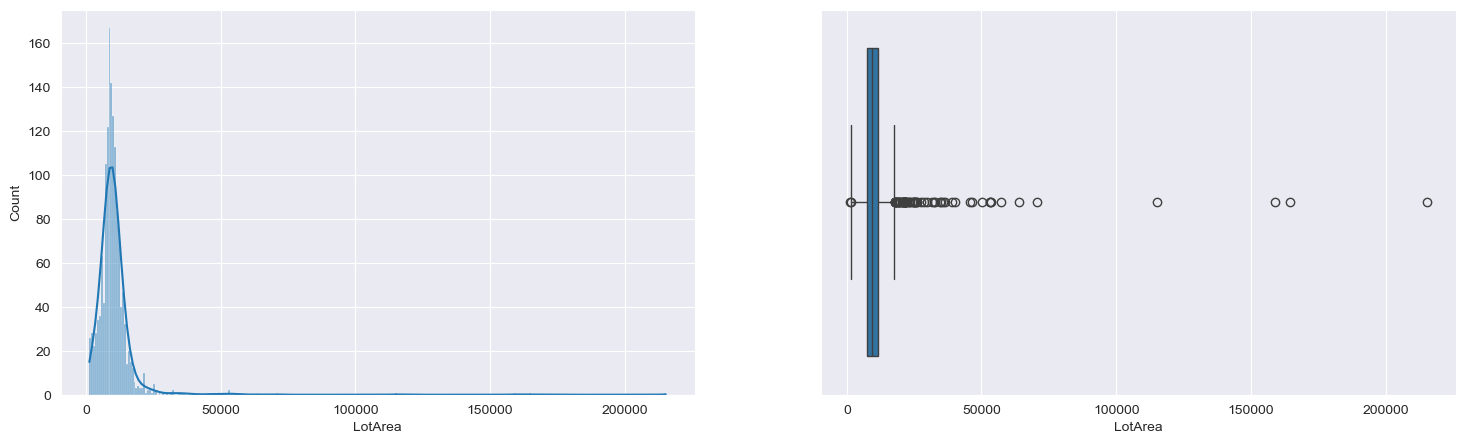

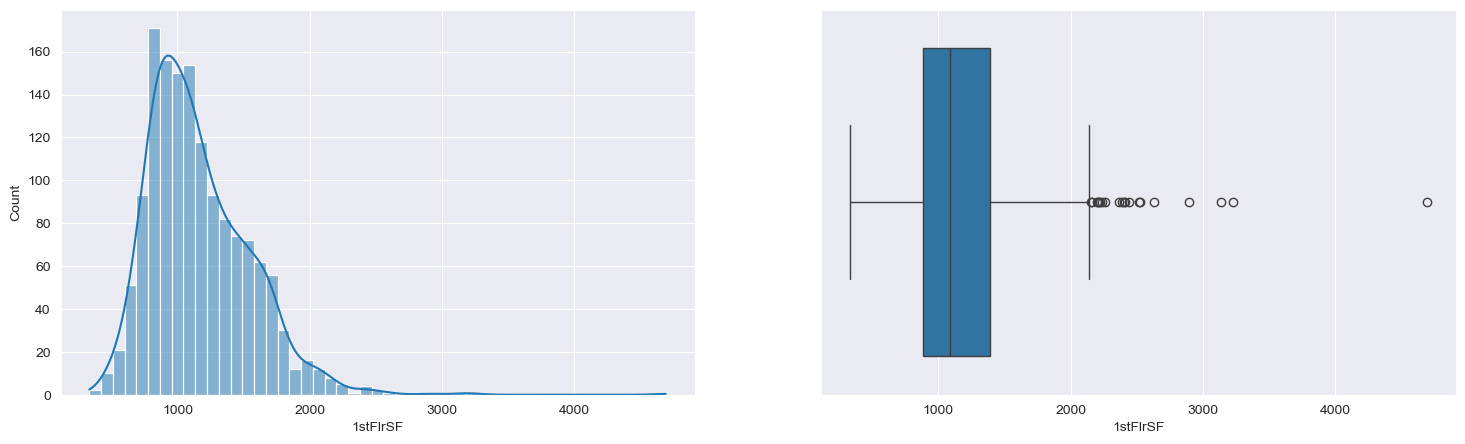

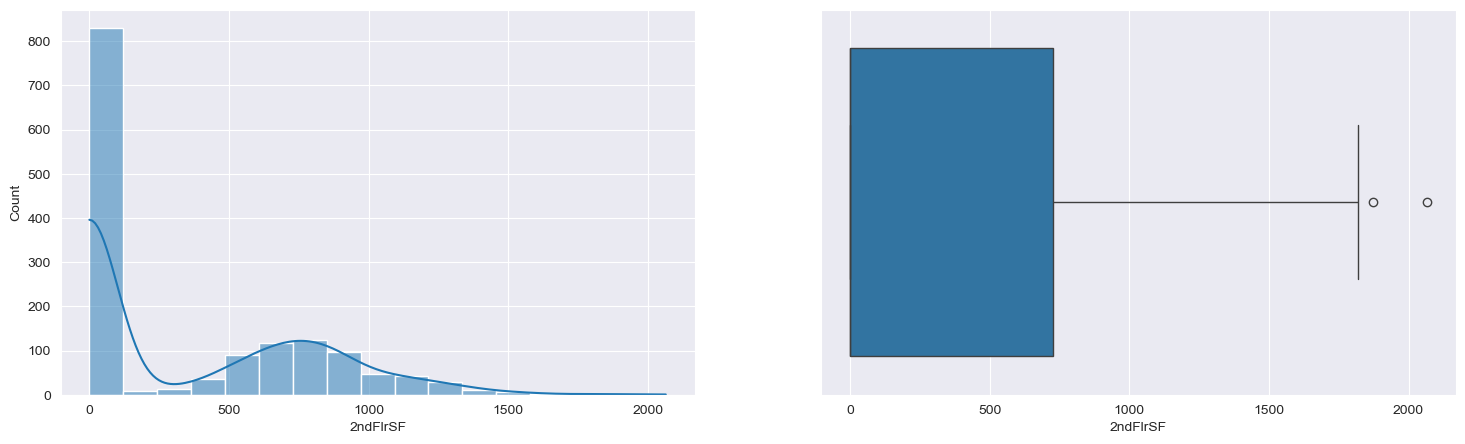

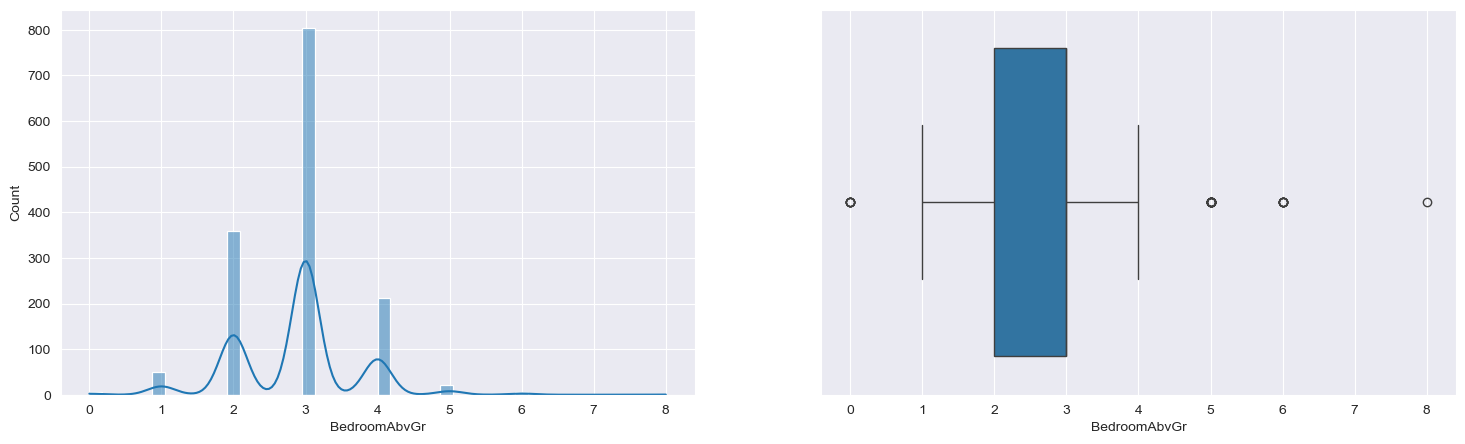

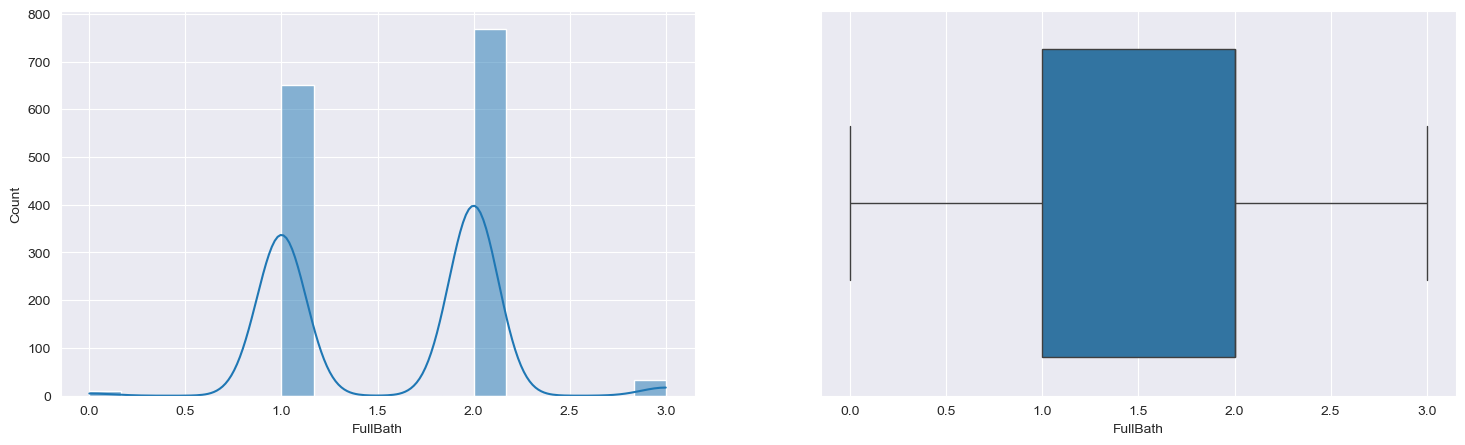

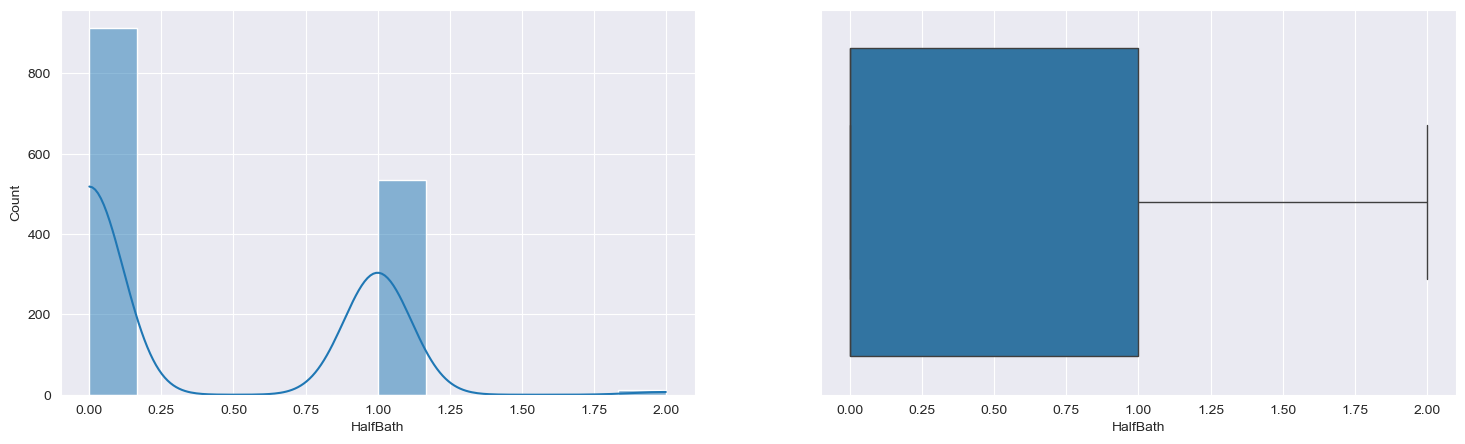

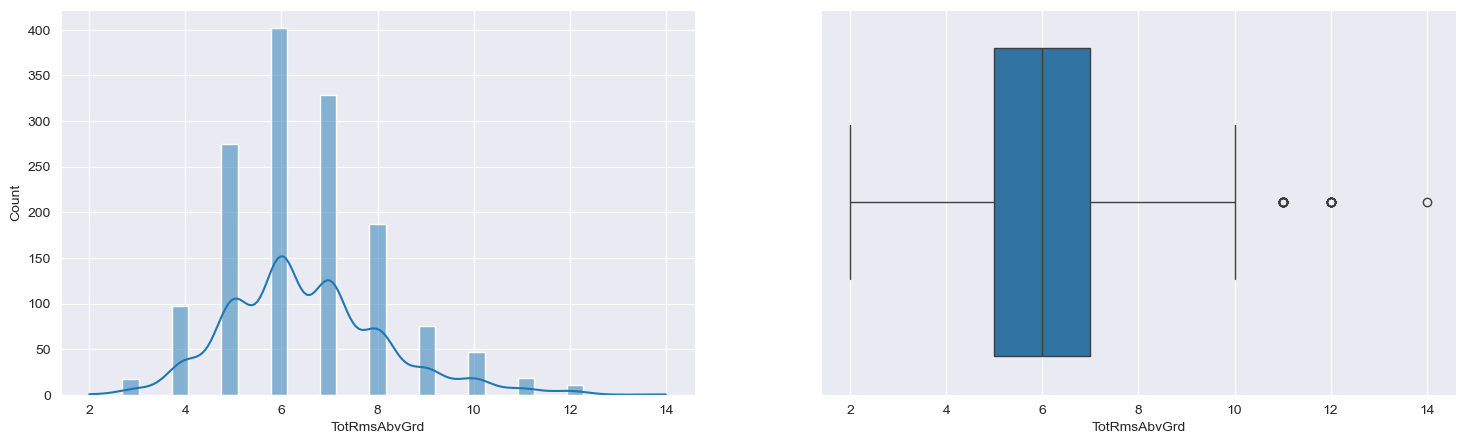

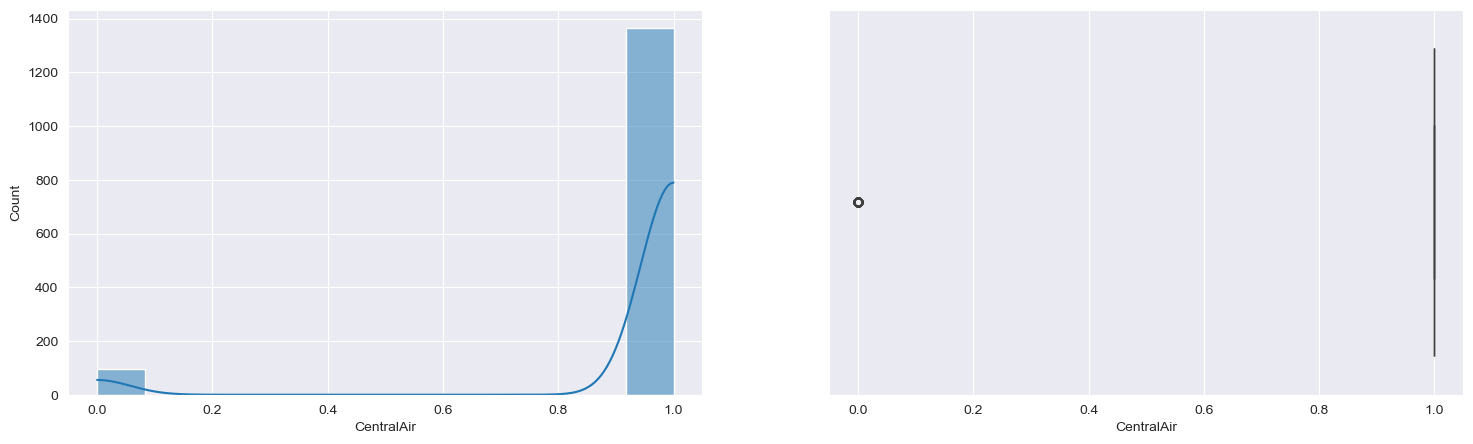

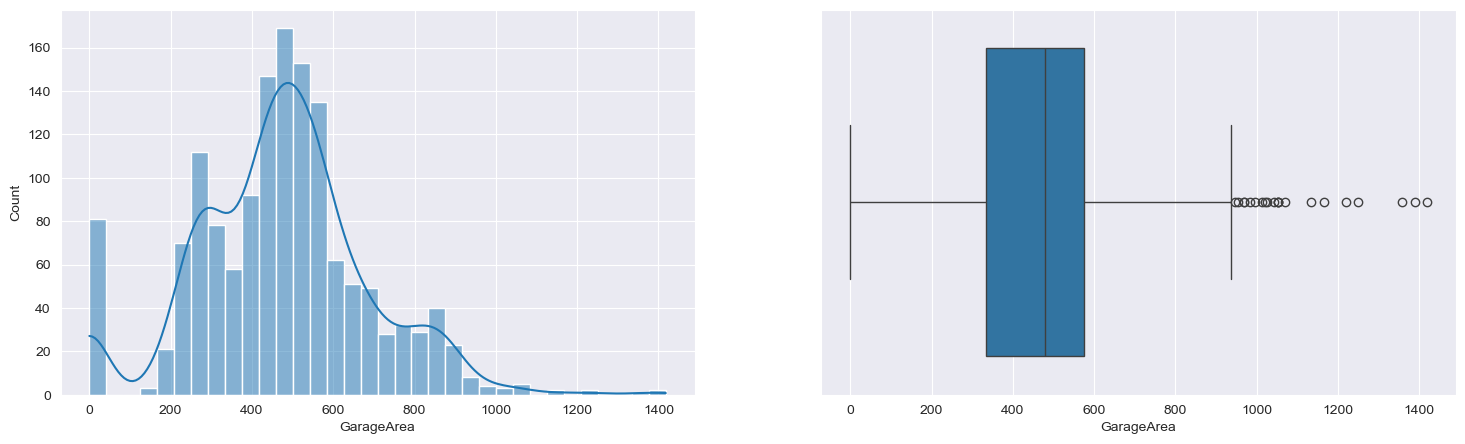

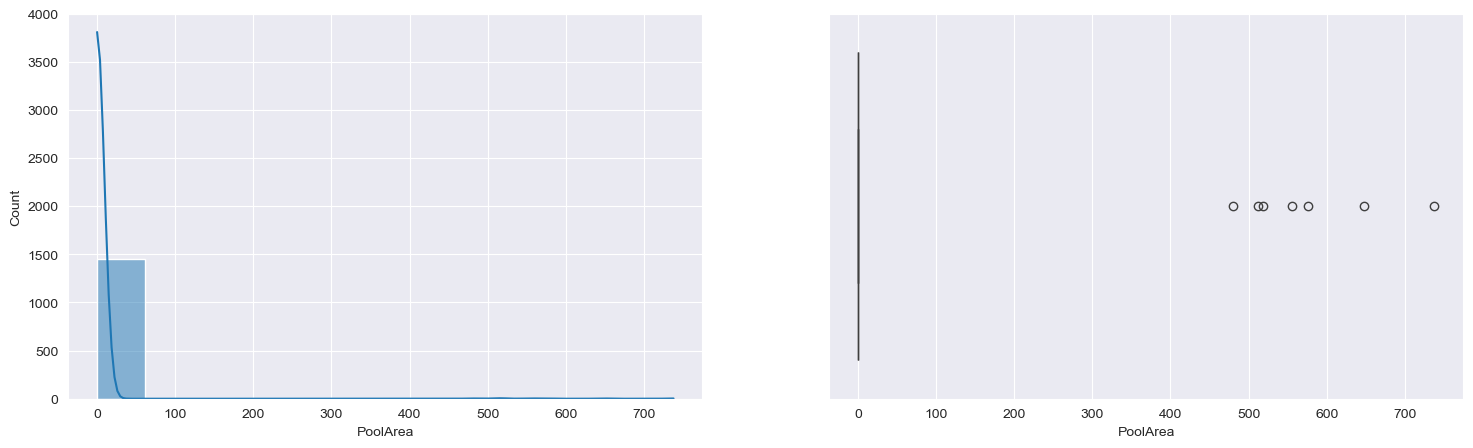

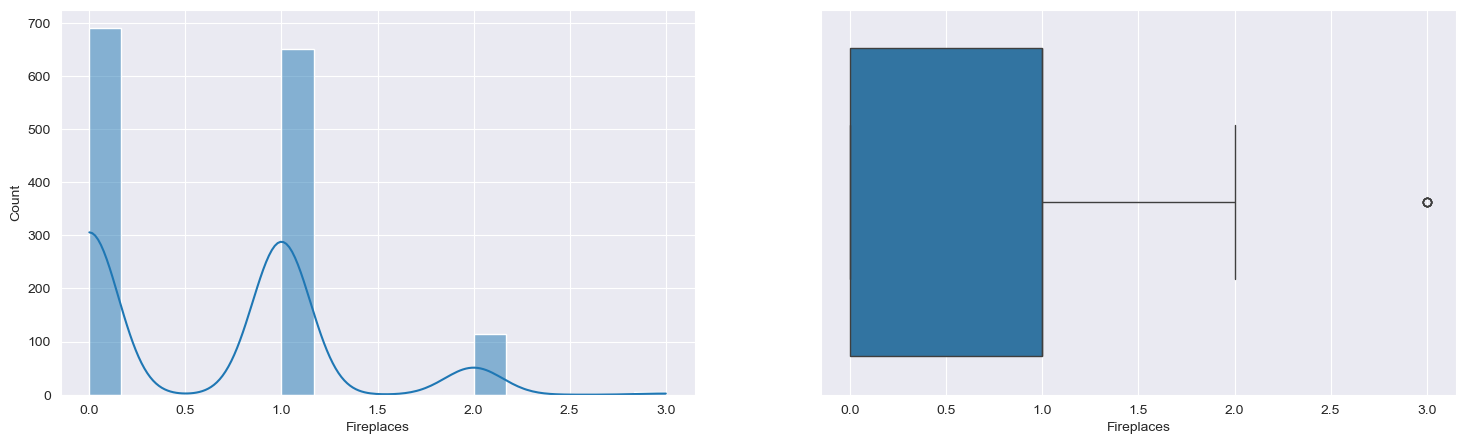

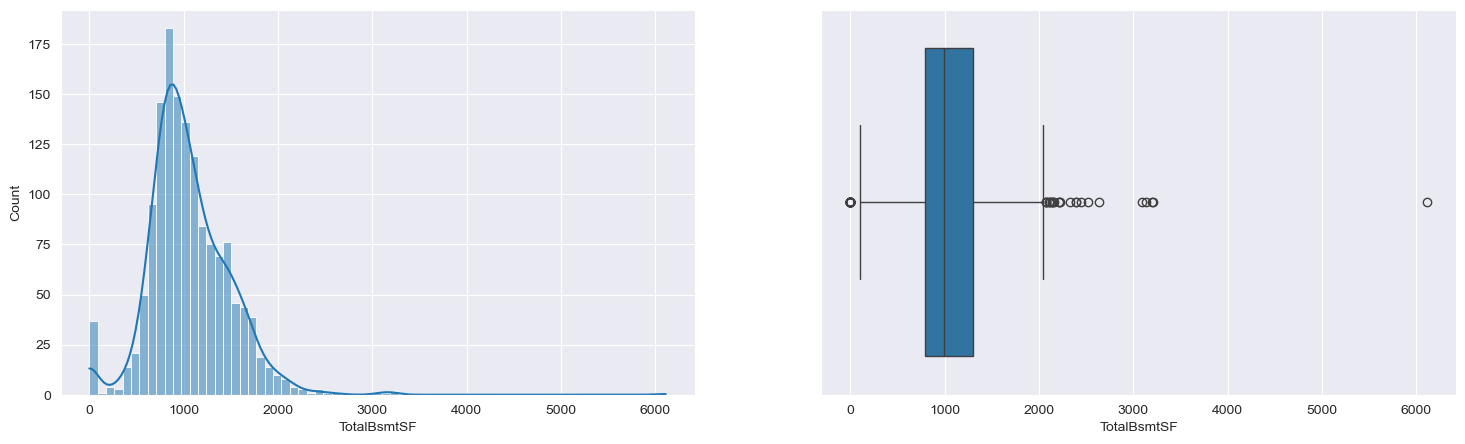

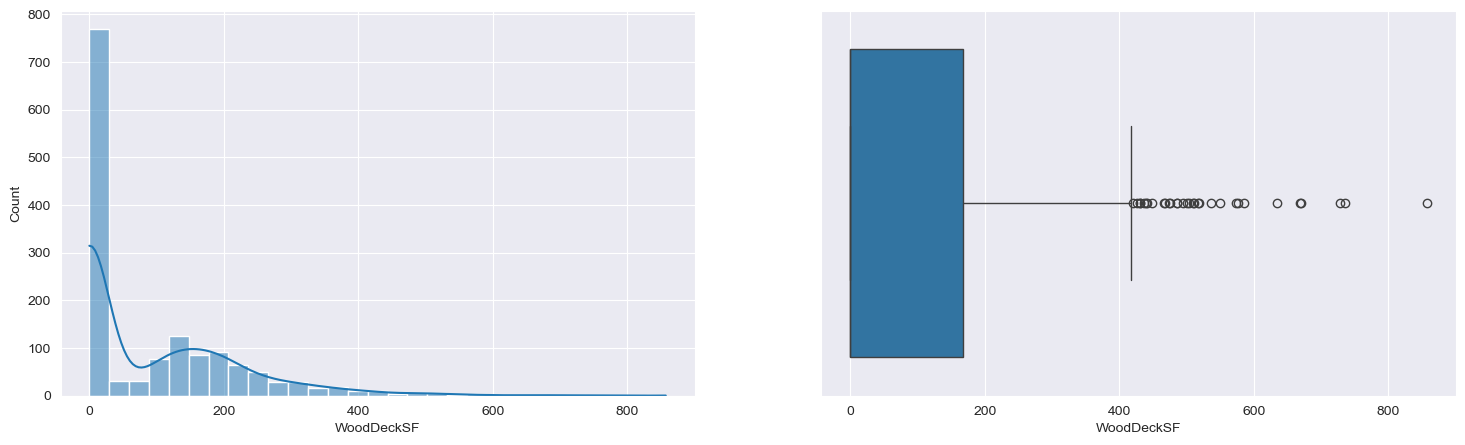

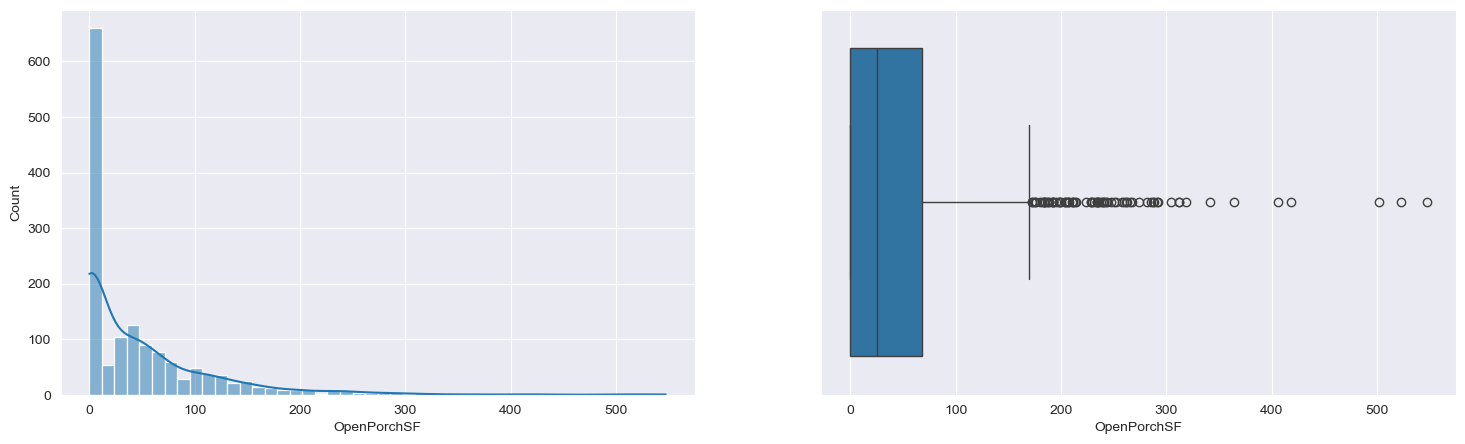

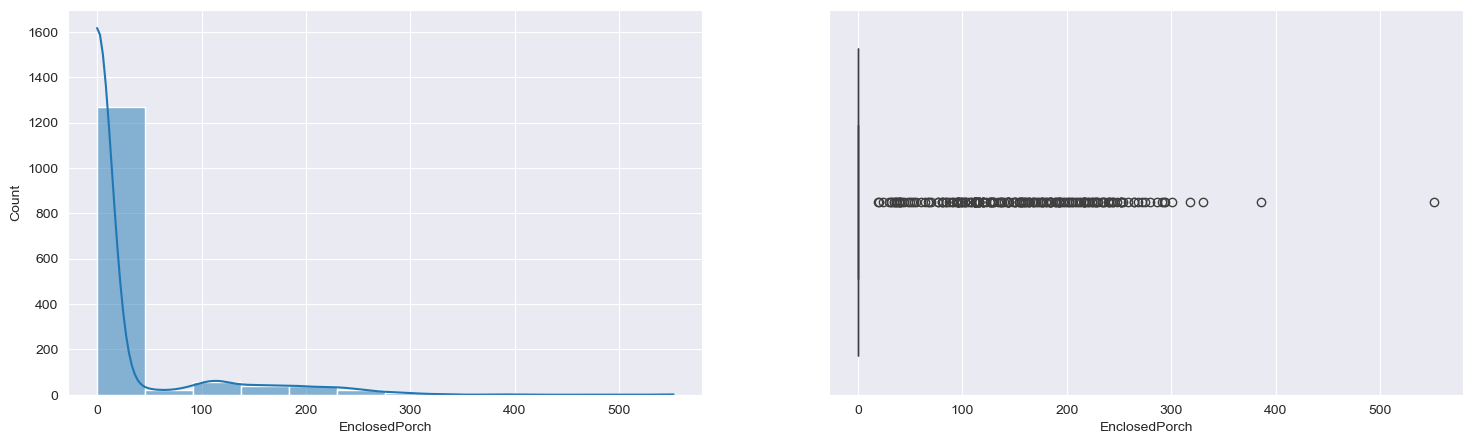

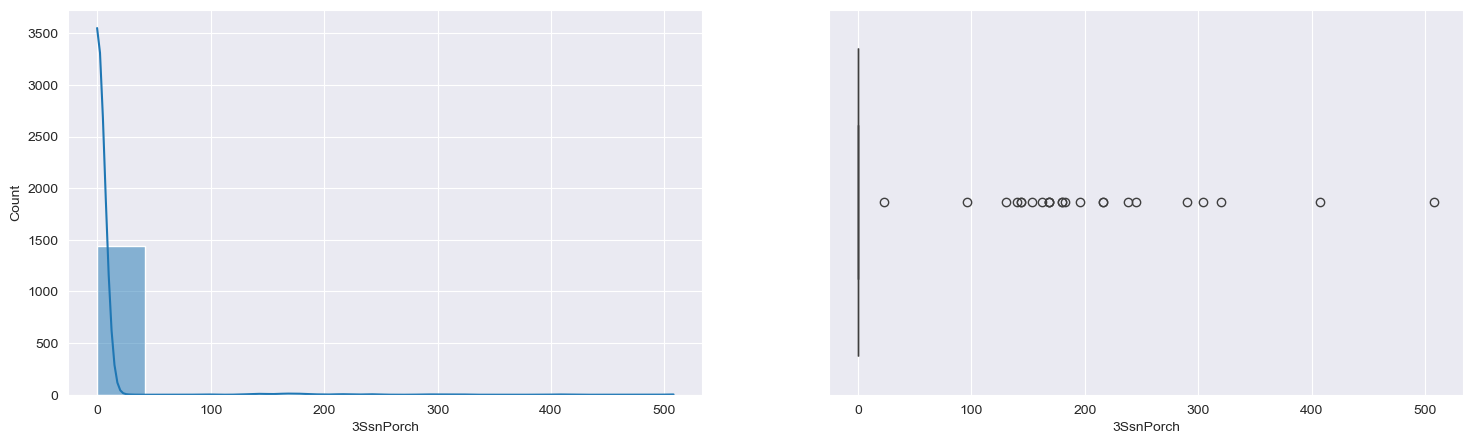

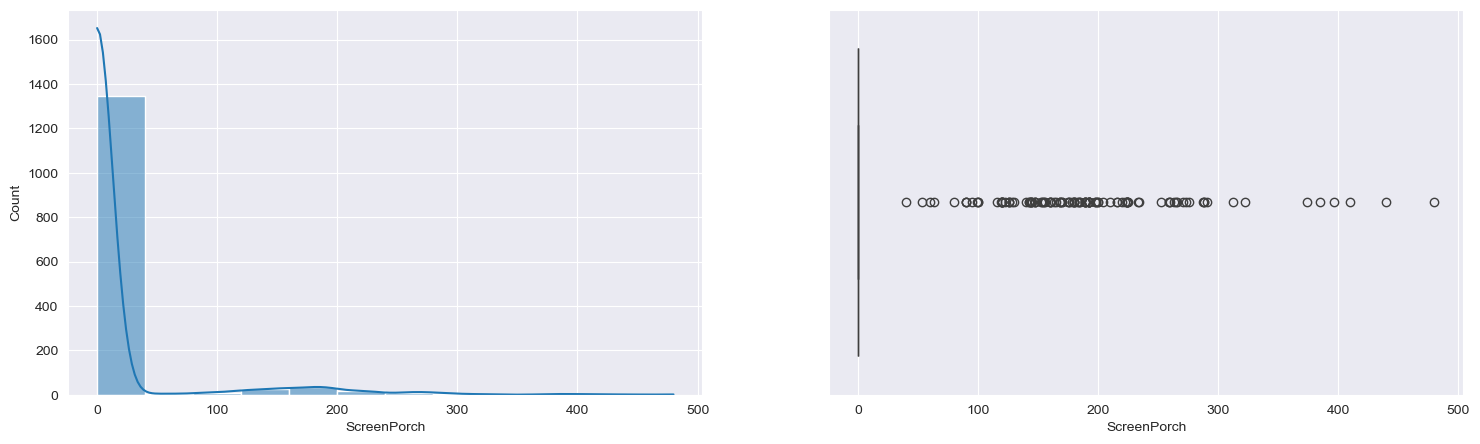

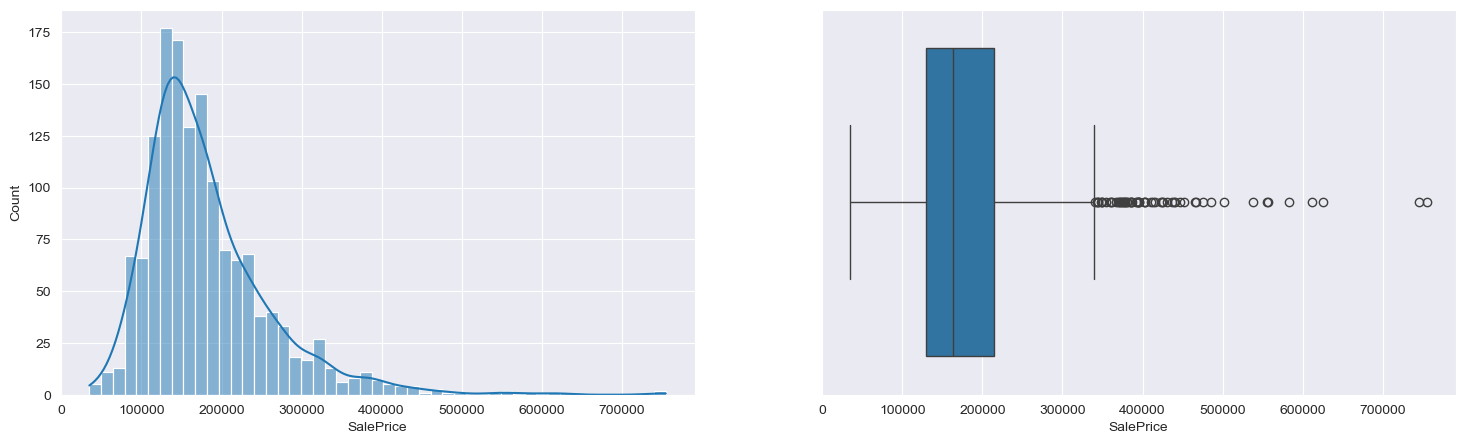

In [181]:
for col in colunas_numericas:
    plt.figure(figsize=(18,5))
    plt.subplot(1,2,1)
    #sns.distplot(df[col])
    sns.histplot(train[col], kde=True)
    plt.subplot(1,2,2)
    sns.boxplot(x=col, data=train)
    plt.show()

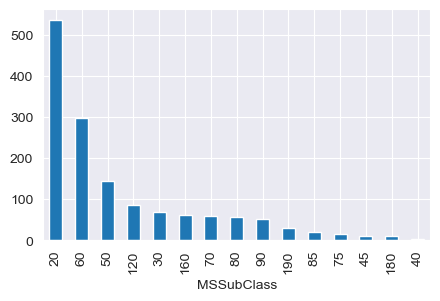

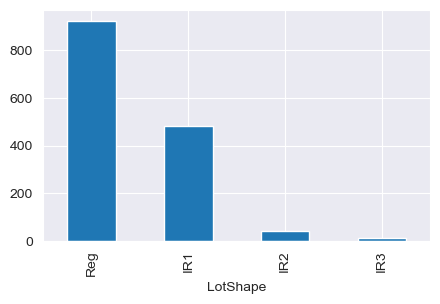

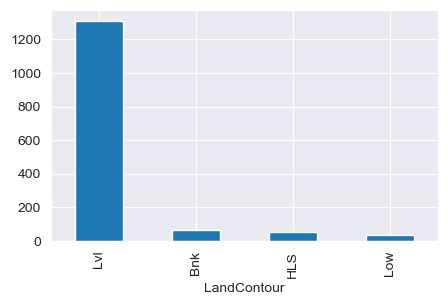

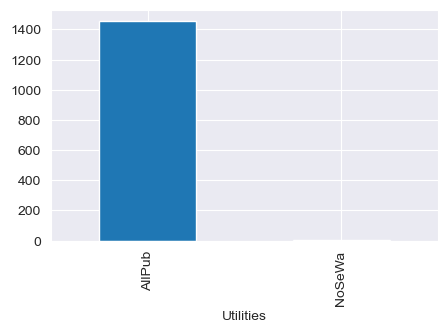

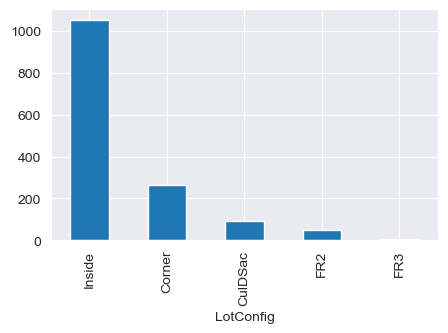

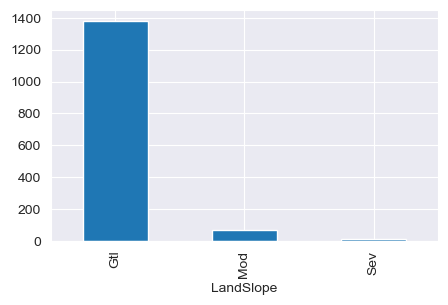

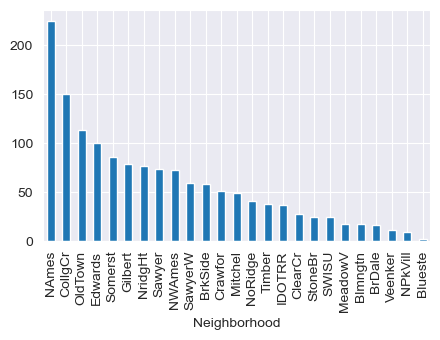

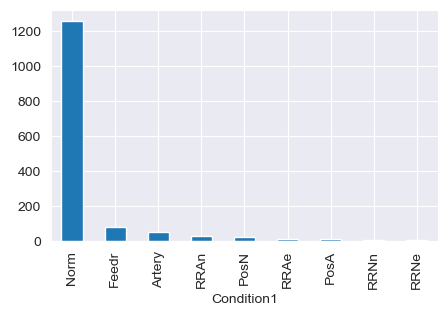

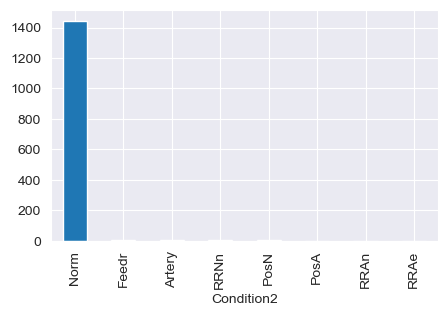

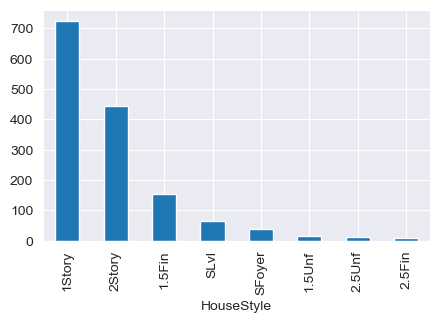

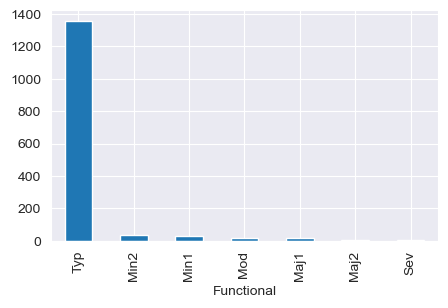

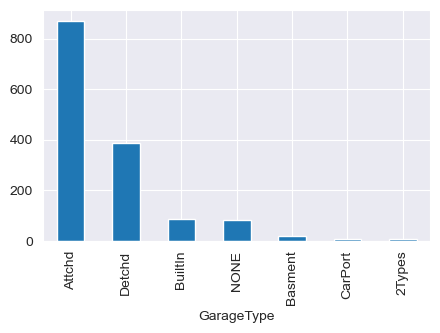

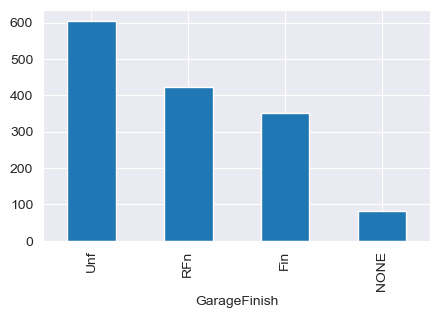

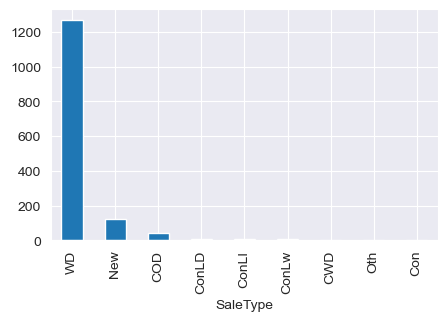

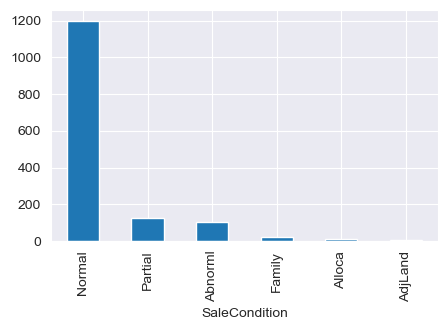

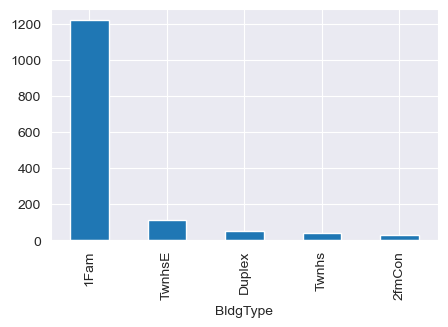

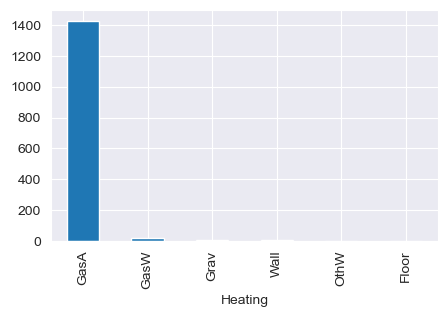

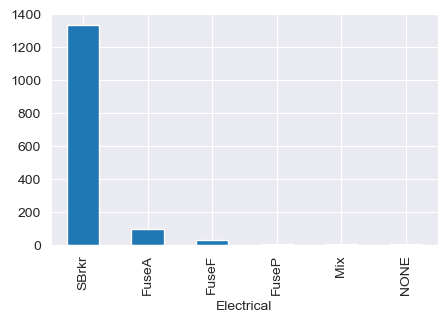

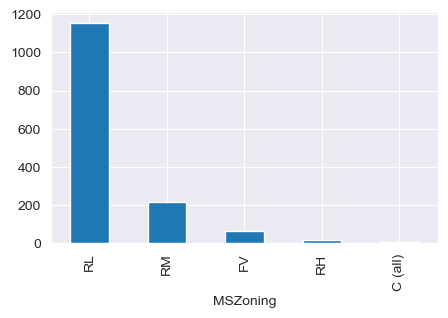

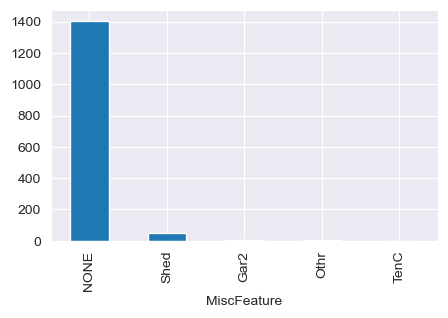

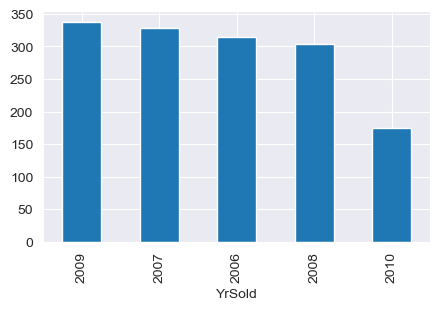

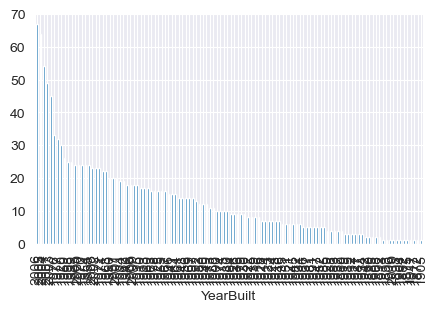

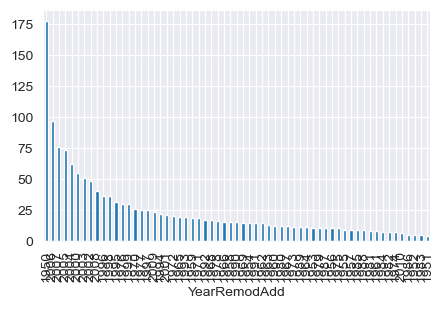

In [182]:
#Variaveis nominais
for col in categoricas_nominais:
    train[col].value_counts().plot(kind="bar", figsize=(5,3))
    plt.show()



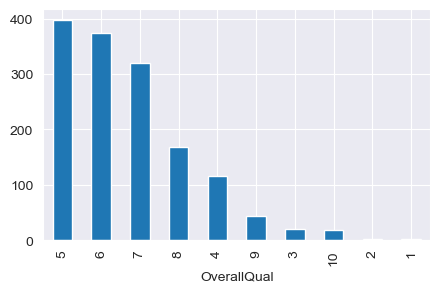

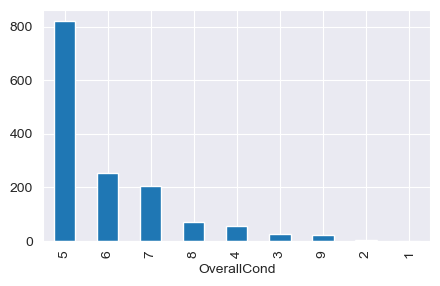

In [166]:
#Variaveis nominais
for col in categoricas_ordinais1:
    train[col].value_counts().plot(kind="bar", figsize=(5,3))
    plt.show()


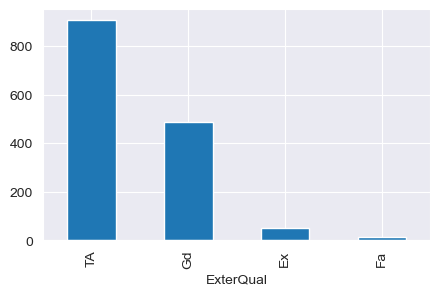

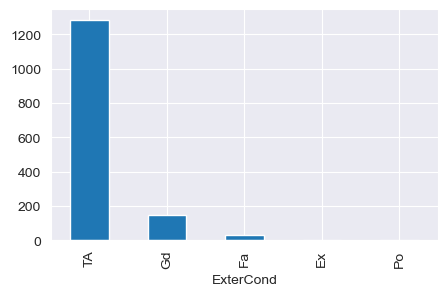

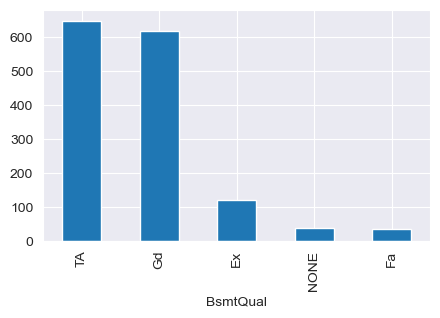

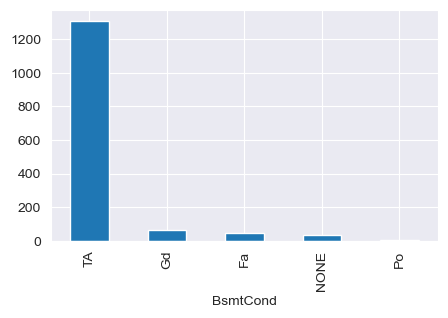

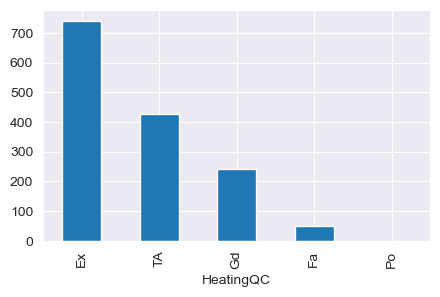

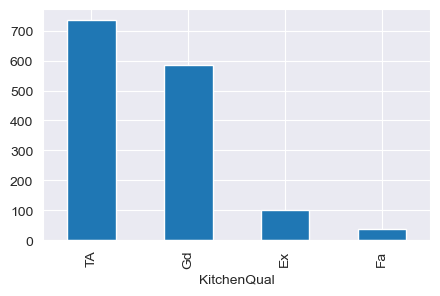

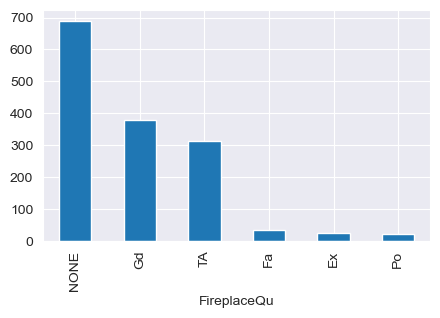

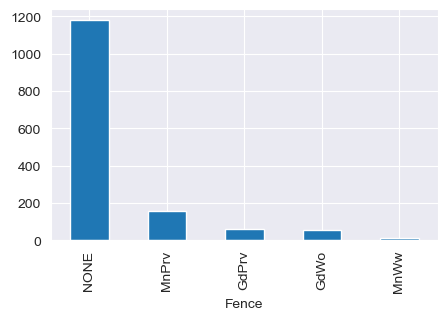

In [167]:
for col in categoricas_ordinais2:
    train[col].value_counts().plot(kind="bar", figsize=(5,3))
    plt.show()


#### Análise bivaliada

<Figure size 1000x1000 with 0 Axes>

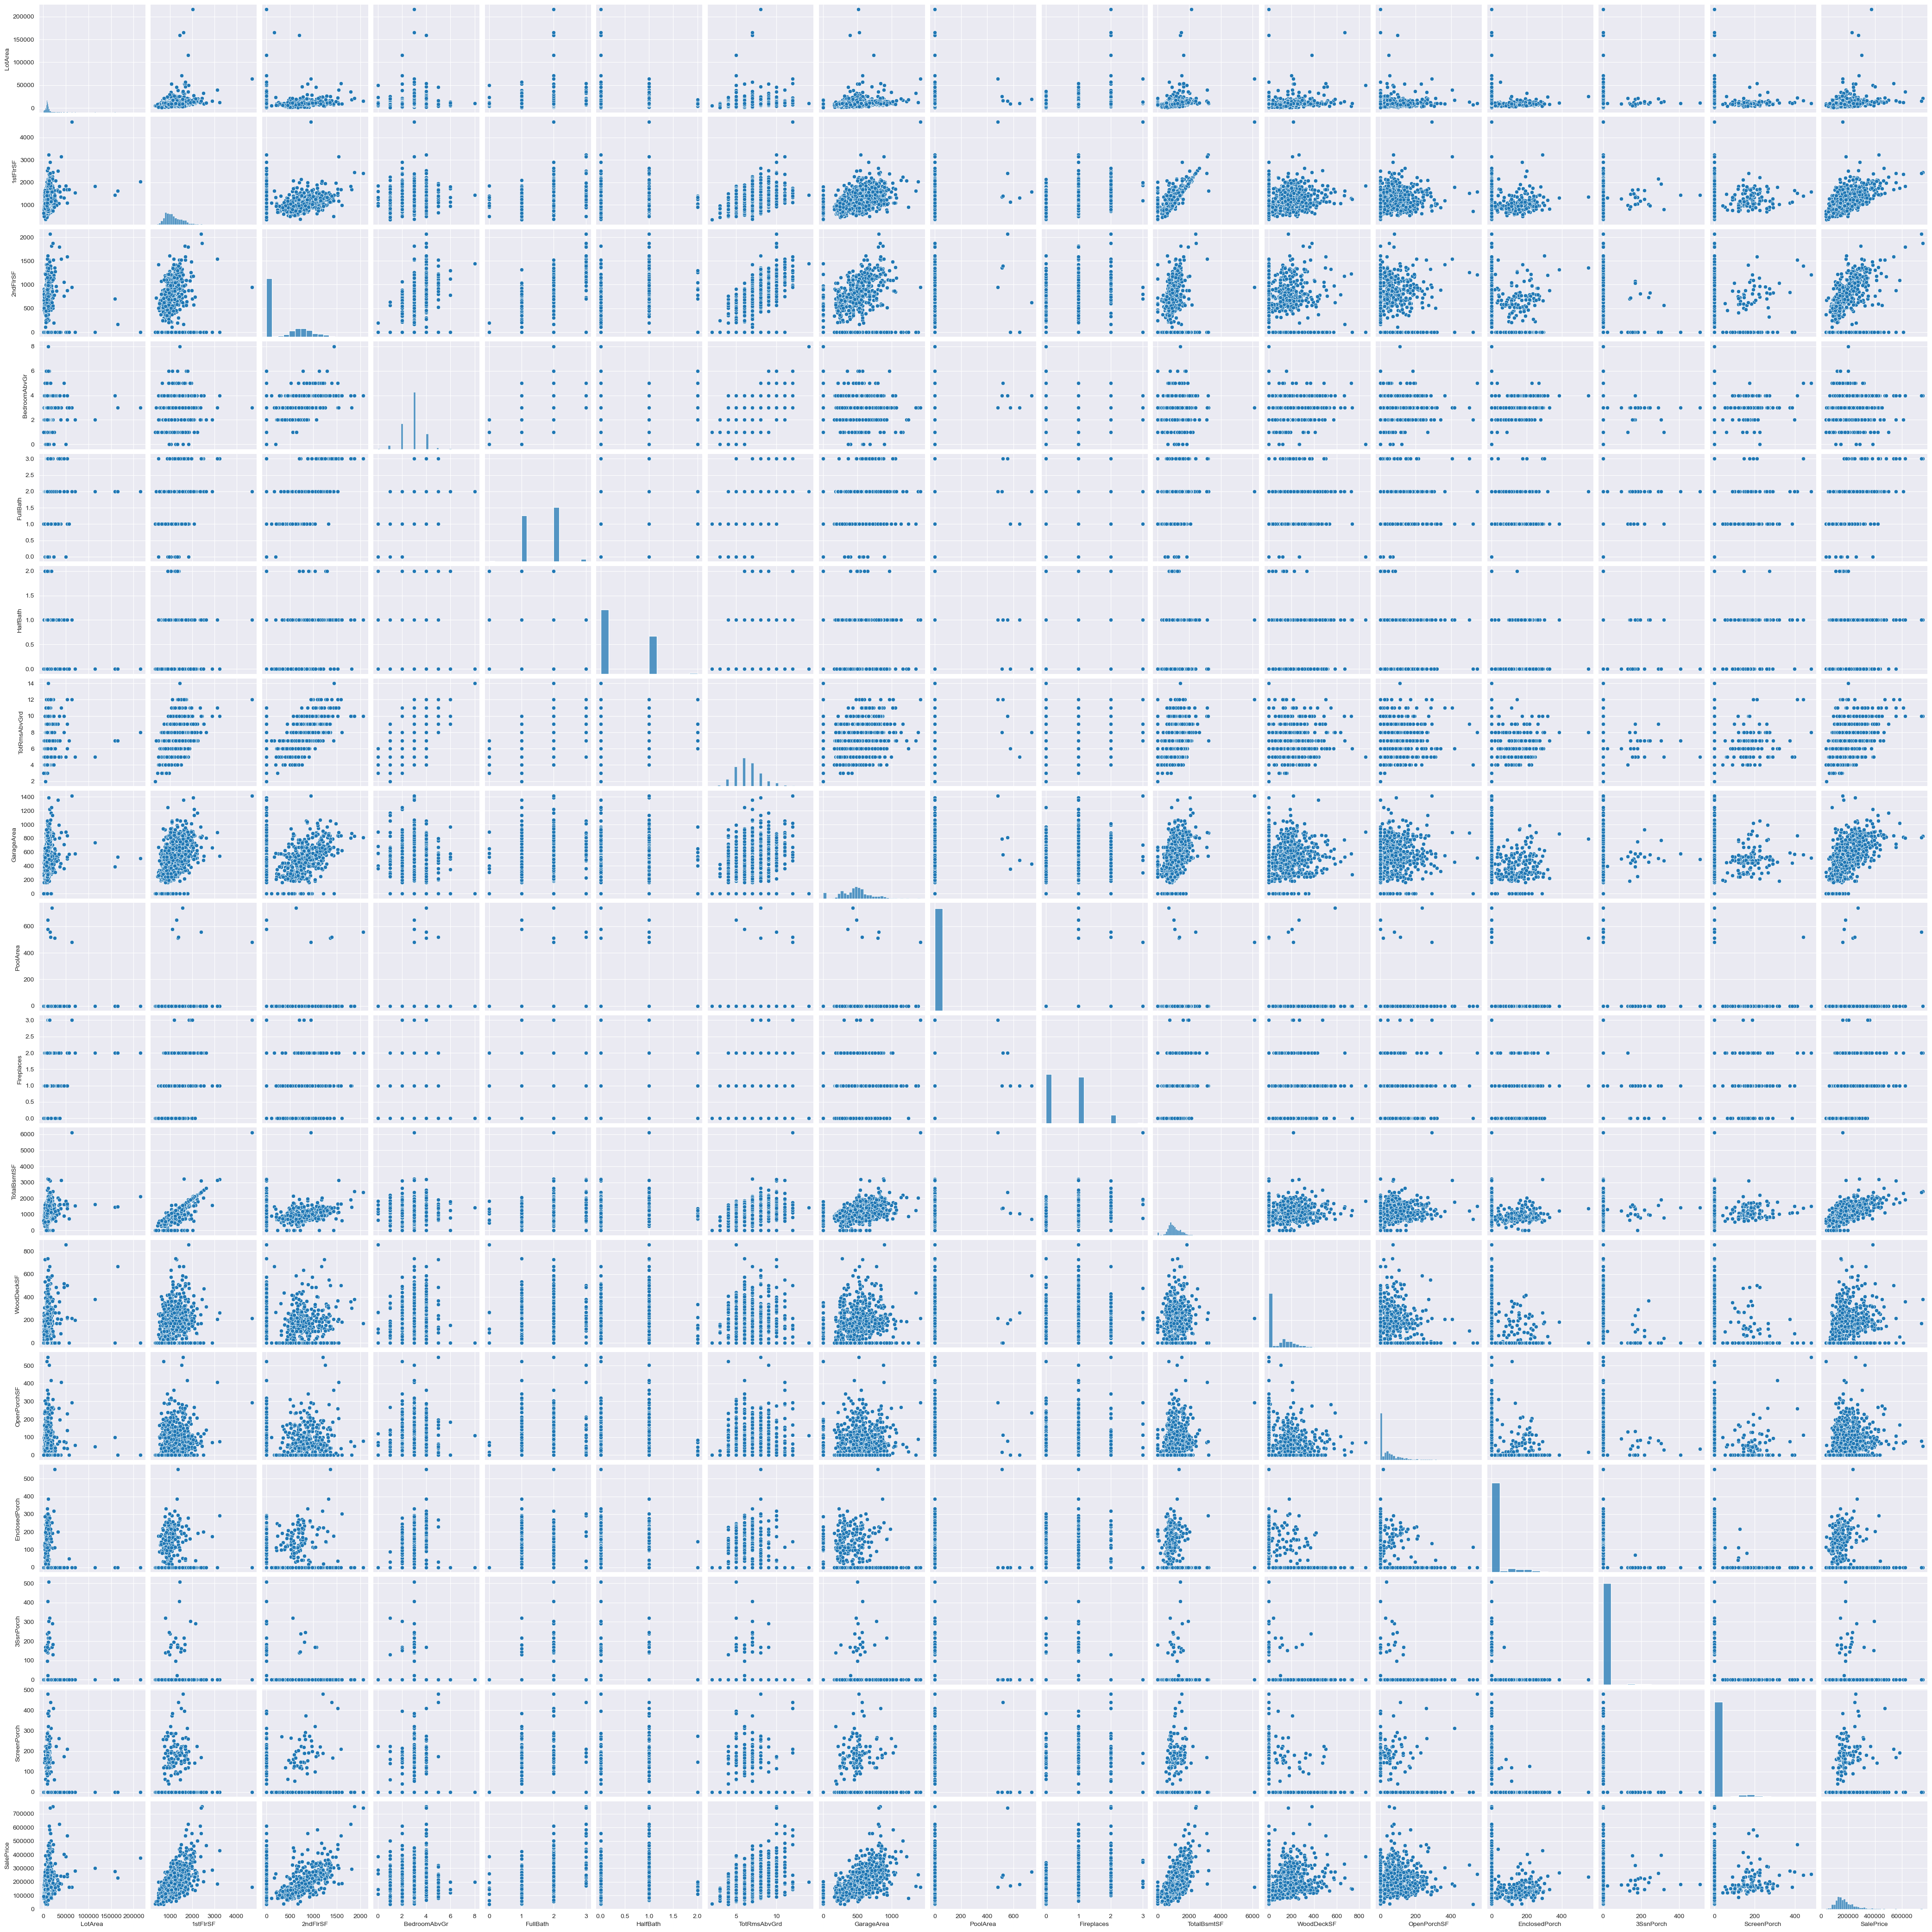

In [171]:
plt.figure(figsize=(10,10))
sns.pairplot(train[colunas_numericas].select_dtypes(include='number'))

<Axes: >

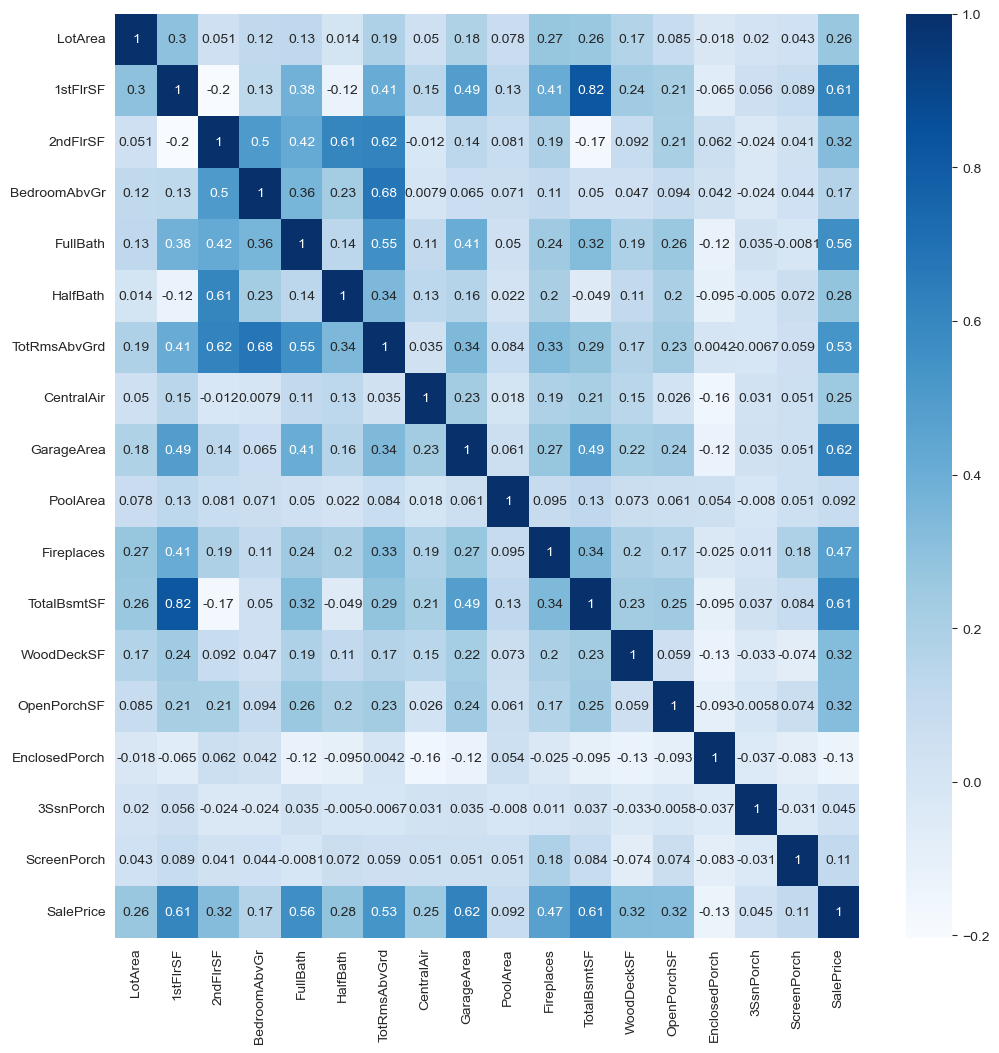

In [183]:
plt.figure(figsize=(12,12))
sns.heatmap(train[colunas_numericas].corr(), cbar=True, annot=True, cmap='Blues')

### Pre-processando variáveis

In [184]:
# codificando categoricas_ordinais1 da base treino
dados_ord1 = train[categoricas_ordinais1]
dados_ord1.index = range(1, len(train)+1)

# codificando categoricas_ordinais1 da base teste
dados_ord1_test = test[categoricas_ordinais1]
dados_ord1_test.index = range(1, len(test)+1)



In [185]:
print(dados_ord1.shape)
print(dados_ord1_test.shape)

(1460, 2)
(1459, 2)


In [186]:
# codificando categoricas_ordinais2 da base treino
from sklearn.preprocessing import LabelEncoder

dados_ord2 = train[categoricas_ordinais2]

# Mapeamento da ordem correta
ordem_correta = {'Ex': 0, 'Gd': 1, 'TA': 2, 'Fa': 3, 'Po': 4, 'NA': 5}

# Criando um objeto para transformar as colunas categóricas usando LabelEncoder
cat_encoder = LabelEncoder()

# Aplicando o LabelEncoder em cada coluna categórica
for coluna in dados_ord2.columns:
    dados_ord2[coluna] = dados_ord2[coluna].map(ordem_correta)
    dados_ord2[coluna] = cat_encoder.fit_transform(dados_ord2[coluna])

dados_ord2.index = range(1, len(train)+1)



In [187]:
# codificando categoricas_ordinais2 da base teste

dados_ord2_test = test[categoricas_ordinais2]

# Mapeamento da ordem correta
ordem_correta = {'Ex': 0, 'Gd': 1, 'TA': 2, 'Fa': 3, 'Po': 4, 'NA': 5}

# Criando um objeto para transformar as colunas categóricas usando LabelEncoder
cat_encoder = LabelEncoder()

# Aplicando o LabelEncoder em cada coluna categórica
for coluna in dados_ord2.columns:
    dados_ord2_test[coluna] = dados_ord2_test[coluna].map(ordem_correta)
    dados_ord2_test[coluna] = cat_encoder.fit_transform(dados_ord2_test[coluna])

dados_ord2_test.index = range(1, len(test)+1)

In [188]:
print(dados_ord1.shape)
print(dados_ord1_test.shape)

(1460, 2)
(1459, 2)


In [189]:
# Mostrando o resultado
print(dados_ord2_test)

      ExterQual  ExterCond  BsmtQual  BsmtCond  HeatingQC  KitchenQual  \
1             2          2         2         1          2            2   
2             2          2         2         1          2            1   
3             2          2         1         1          1            2   
4             2          2         2         1          0            1   
5             1          2         1         1          0            1   
...         ...        ...       ...       ...        ...          ...   
1455          2          2         2         1          1            2   
1456          2          2         2         1          2            2   
1457          2          2         2         1          0            2   
1458          2          2         1         1          2            2   
1459          2          2         1         1          0            2   

      FireplaceQu  Fence  
1               5      0  
2               5      0  
3               2      0  
4  

In [190]:
categoricas_nominais

['MSSubClass',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'HouseStyle',
 'Functional',
 'GarageType',
 'GarageFinish',
 'SaleType',
 'SaleCondition',
 'BldgType',
 'Heating',
 'Electrical',
 'MSZoning',
 'MiscFeature',
 'YrSold',
 'YearBuilt',
 'YearRemodAdd']

In [191]:
# Tratando variáveis nominais na base treino

dados_nom = train[categoricas_nominais]
dados_nom.head()

MSSubClass LotShape LandContour Utilities LotConfig LandSlope Neighborhood  \
Id                                                                              
1          60      Reg         Lvl    AllPub    Inside       Gtl      CollgCr   
2          20      Reg         Lvl    AllPub       FR2       Gtl      Veenker   
3          60      IR1         Lvl    AllPub    Inside       Gtl      CollgCr   
4          70      IR1         Lvl    AllPub    Corner       Gtl      Crawfor   
5          60      IR1         Lvl    AllPub       FR2       Gtl      NoRidge   

   Condition1 Condition2 HouseStyle Functional GarageType GarageFinish  \
Id                                                                       
1        Norm       Norm     2Story        Typ     Attchd          RFn   
2       Feedr       Norm     1Story        Typ     Attchd          RFn   
3        Norm       Norm     2Story        Typ     Attchd          RFn   
4        Norm       Norm     2Story        Typ     Detchd          Unf   
5        Norm       Norm     2Story        Typ     Attchd          RFn   

   SaleType SaleCondition BldgType Heating Electrical MSZoning MiscFeature  \
Id                                                                           
1        WD        Normal     1Fam    GasA      SBrkr       RL        NONE   
2        WD        Normal     1Fam    GasA      SBrkr       RL        NONE   
3        WD        Normal     1Fam    GasA      SBrkr       RL        NONE   
4        WD       Abnorml     1Fam    GasA      SBrkr       RL        NONE   
5        WD        Normal     1Fam    GasA      SBrkr       RL        NONE   

    YrSold  YearBuilt  YearRemodAdd  
Id                                   
1     2008       2003          2003  
2     2007       1976          1976  
3     2008       2001          2002  
4     2006       1915          1970  
5     2008       2000          2000

In [192]:
# Tratando variáveis nominais na base treino
dados_nom_test = test[categoricas_nominais]
dados_nom_test.head()

MSSubClass LotShape LandContour Utilities LotConfig LandSlope  \
Id                                                                   
1461         20      Reg         Lvl    AllPub    Inside       Gtl   
1462         20      IR1         Lvl    AllPub    Corner       Gtl   
1463         60      IR1         Lvl    AllPub    Inside       Gtl   
1464         60      IR1         Lvl    AllPub    Inside       Gtl   
1465        120      IR1         HLS    AllPub    Inside       Gtl   

     Neighborhood Condition1 Condition2 HouseStyle Functional GarageType  \
Id                                                                         
1461        NAmes      Feedr       Norm     1Story        Typ     Attchd   
1462        NAmes       Norm       Norm     1Story        Typ     Attchd   
1463      Gilbert       Norm       Norm     2Story        Typ     Attchd   
1464      Gilbert       Norm       Norm     2Story        Typ     Attchd   
1465      StoneBr       Norm       Norm     1Story        Typ     Attchd   

     GarageFinish SaleType SaleCondition BldgType Heating Electrical MSZoning  \
Id                                                                              
1461          Unf       WD        Normal     1Fam    GasA      SBrkr       RH   
1462          Unf       WD        Normal     1Fam    GasA      SBrkr       RL   
1463          Fin       WD        Normal     1Fam    GasA      SBrkr       RL   
1464          Fin       WD        Normal     1Fam    GasA      SBrkr       RL   
1465          RFn       WD        Normal   TwnhsE    GasA      SBrkr       RL   

     MiscFeature  YrSold  YearBuilt  YearRemodAdd  
Id                                                 
1461        NONE    2010       1961          1961  
1462        Gar2    2010       1958          1958  
1463        NONE    2010       1997          1998  
1464        NONE    2010       1998          1998  
1465        NONE    2010       1992          1992

In [193]:
dados_nom = dados_nom.T.drop_duplicates().T
dados_nom_test = dados_nom_test.T.drop_duplicates().T


In [194]:
dados_nom_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1459 entries, 1461 to 2919
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSSubClass     1459 non-null   object
 1   LotShape       1459 non-null   object
 2   LandContour    1459 non-null   object
 3   Utilities      1459 non-null   object
 4   LotConfig      1459 non-null   object
 5   LandSlope      1459 non-null   object
 6   Neighborhood   1459 non-null   object
 7   Condition1     1459 non-null   object
 8   Condition2     1459 non-null   object
 9   HouseStyle     1459 non-null   object
 10  Functional     1459 non-null   object
 11  GarageType     1459 non-null   object
 12  GarageFinish   1459 non-null   object
 13  SaleType       1459 non-null   object
 14  SaleCondition  1459 non-null   object
 15  BldgType       1459 non-null   object
 16  Heating        1459 non-null   object
 17  Electrical     1459 non-null   object
 18  MSZoning       1459 non-null  

In [195]:
#Checking for wrong entries like symbols -,?,#,*,etc.
for col in dados_nom_test.columns:
    print('{} : {}'.format(col, dados_nom_test[col].unique()))

MSSubClass : ['20' '60' '120' '160' '80' '30' '50' '90' '85' '190' '45' '70' '75' '180'
 '40' '150']
LotShape : ['Reg' 'IR1' 'IR2' 'IR3']
LandContour : ['Lvl' 'HLS' 'Bnk' 'Low']
Utilities : ['AllPub' 'NONE']
LotConfig : ['Inside' 'Corner' 'FR2' 'CulDSac' 'FR3']
LandSlope : ['Gtl' 'Mod' 'Sev']
Neighborhood : ['NAmes' 'Gilbert' 'StoneBr' 'BrDale' 'NPkVill' 'NridgHt' 'Blmngtn'
 'NoRidge' 'Somerst' 'SawyerW' 'Sawyer' 'NWAmes' 'OldTown' 'BrkSide'
 'ClearCr' 'SWISU' 'Edwards' 'CollgCr' 'Crawfor' 'Blueste' 'IDOTRR'
 'Mitchel' 'Timber' 'MeadowV' 'Veenker']
Condition1 : ['Feedr' 'Norm' 'PosN' 'RRNe' 'Artery' 'RRNn' 'PosA' 'RRAn' 'RRAe']
Condition2 : ['Norm' 'Feedr' 'PosA' 'PosN' 'Artery']
HouseStyle : ['1Story' '2Story' 'SLvl' '1.5Fin' 'SFoyer' '2.5Unf' '1.5Unf']
Functional : ['Typ' 'Min2' 'Min1' 'Mod' 'Maj1' 'Sev' 'Maj2' 'NONE']
GarageType : ['Attchd' 'Detchd' 'BuiltIn' 'NONE' 'Basment' '2Types' 'CarPort']
GarageFinish : ['Unf' 'Fin' 'RFn' 'NONE']
SaleType : ['WD' 'COD' 'New' 'ConLD' 'Oth' 'Co

In [196]:
#treino
# Criar um objeto OneHotEncoder
onehot_encoder = OneHotEncoder(sparse=False, drop='first')

# Aplicar o OneHotEncoder nas colunas categóricas nominais
dados_categoricas_nominais_one_hot_encoded = onehot_encoder.fit_transform(train[categoricas_nominais])

# Obter os nomes das colunas a partir do objeto OneHotEncoder
colunas = onehot_encoder.get_feature_names_out()

# Transformar o objeto numpy.ndarray em um DataFrame
dados_nom = pd.DataFrame(dados_categoricas_nominais_one_hot_encoded, columns=colunas)

dados_nom.index = range(1, len(train)+1)

dados_nom

MSSubClass_160  MSSubClass_180  MSSubClass_190  MSSubClass_20  \
1               0.00            0.00            0.00           0.00   
2               0.00            0.00            0.00           1.00   
3               0.00            0.00            0.00           0.00   
4               0.00            0.00            0.00           0.00   
5               0.00            0.00            0.00           0.00   
...              ...             ...             ...            ...   
1456            0.00            0.00            0.00           0.00   
1457            0.00            0.00            0.00           1.00   
1458            0.00            0.00            0.00           0.00   
1459            0.00            0.00            0.00           1.00   
1460            0.00            0.00            0.00           1.00   

      MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  \
1              0.00           0.00           0.00           0.00   
2              0.00           0.00           0.00           0.00   
3              0.00           0.00           0.00           0.00   
4              0.00           0.00           0.00           0.00   
5              0.00           0.00           0.00           0.00   
...             ...            ...            ...            ...   
1456           0.00           0.00           0.00           0.00   
1457           0.00           0.00           0.00           0.00   
1458           0.00           0.00           0.00           0.00   
1459           0.00           0.00           0.00           0.00   
1460           0.00           0.00           0.00           0.00   

      MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  \
1              1.00           0.00           0.00           0.00   
2              0.00           0.00           0.00           0.00   
3              1.00           0.00           0.00           0.00   
4              0.00           1.00           0.00           0.00   
5              1.00           0.00           0.00           0.00   
...             ...            ...            ...            ...   
1456           1.00           0.00           0.00           0.00   
1457           0.00           0.00           0.00           0.00   
1458           0.00           1.00           0.00           0.00   
1459           0.00           0.00           0.00           0.00   
1460           0.00           0.00           0.00           0.00   

      MSSubClass_85  MSSubClass_90  LotShape_IR2  LotShape_IR3  LotShape_Reg  \
1              0.00           0.00          0.00          0.00          1.00   
2              0.00           0.00          0.00          0.00          1.00   
3              0.00           0.00          0.00          0.00          0.00   
4              0.00           0.00          0.00          0.00          0.00   
5              0.00           0.00          0.00          0.00          0.00   
...             ...            ...           ...           ...           ...   
1456           0.00           0.00          0.00          0.00          1.00   
1457           0.00           0.00          0.00          0.00          1.00   
1458           0.00           0.00          0.00          0.00          1.00   
1459           0.00           0.00          0.00          0.00          1.00   
1460           0.00           0.00          0.00          0.00          1.00   

      LandContour_HLS  LandContour_Low  LandContour_Lvl  Utilities_NoSeWa  \
1                0.00             0.00             1.00              0.00   
2                0.00             0.00             1.00              0.00   
3                0.00             0.00             1.00              0.00   
4                0.00             0.00             1.00              0.00   
5                0.00             0.00             1.00              0.00   
...               ...              ...              ...               ...   
1456             0.

In [197]:

#treino
# Criar um objeto OneHotEncoder
onehot_encoder = OneHotEncoder(sparse=False, drop='first')

# Aplicar o OneHotEncoder nas colunas categóricas nominais
dados_categoricas_nominais_one_hot_encoded_test = onehot_encoder.fit_transform(test[categoricas_nominais])

# Obter os nomes das colunas a partir do objeto OneHotEncoder
colunas = onehot_encoder.get_feature_names_out()

# Transformar o objeto numpy.ndarray em um DataFrame
dados_nom_test = pd.DataFrame(dados_categoricas_nominais_one_hot_encoded_test, columns=colunas)

dados_nom_test.index = range(1, len(test)+1)

dados_nom_test

MSSubClass_150  MSSubClass_160  MSSubClass_180  MSSubClass_190  \
1               0.00            0.00            0.00            0.00   
2               0.00            0.00            0.00            0.00   
3               0.00            0.00            0.00            0.00   
4               0.00            0.00            0.00            0.00   
5               0.00            0.00            0.00            0.00   
...              ...             ...             ...             ...   
1455            0.00            1.00            0.00            0.00   
1456            0.00            1.00            0.00            0.00   
1457            0.00            0.00            0.00            0.00   
1458            0.00            0.00            0.00            0.00   
1459            0.00            0.00            0.00            0.00   

      MSSubClass_20  MSSubClass_30  MSSubClass_40  MSSubClass_45  \
1              1.00           0.00           0.00           0.00   
2              1.00           0.00           0.00           0.00   
3              0.00           0.00           0.00           0.00   
4              0.00           0.00           0.00           0.00   
5              0.00           0.00           0.00           0.00   
...             ...            ...            ...            ...   
1455           0.00           0.00           0.00           0.00   
1456           0.00           0.00           0.00           0.00   
1457           1.00           0.00           0.00           0.00   
1458           0.00           0.00           0.00           0.00   
1459           0.00           0.00           0.00           0.00   

      MSSubClass_50  MSSubClass_60  MSSubClass_70  MSSubClass_75  \
1              0.00           0.00           0.00           0.00   
2              0.00           0.00           0.00           0.00   
3              0.00           1.00           0.00           0.00   
4              0.00           1.00           0.00           0.00   
5              0.00           0.00           0.00           0.00   
...             ...            ...            ...            ...   
1455           0.00           0.00           0.00           0.00   
1456           0.00           0.00           0.00           0.00   
1457           0.00           0.00           0.00           0.00   
1458           0.00           0.00           0.00           0.00   
1459           0.00           1.00           0.00           0.00   

      MSSubClass_80  MSSubClass_85  MSSubClass_90  LotShape_IR2  LotShape_IR3  \
1              0.00           0.00           0.00          0.00          0.00   
2              0.00           0.00           0.00          0.00          0.00   
3              0.00           0.00           0.00          0.00          0.00   
4              0.00           0.00           0.00          0.00          0.00   
5              0.00           0.00           0.00          0.00          0.00   
...             ...            ...            ...           ...           ...   
1455           0.00           0.00           0.00          0.00          0.00   
1456           0.00           0.00           0.00          0.00          0.00   
1457           0.00           0.00           0.00          0.00          0.00   
1458           0.00           1.00           0.00          0.00          0.00   
1459           0.00           0.00           0.00          0.00          0.00   

      LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  \
1             1.00             0.00             0.00             1.00   
2             0.00             0.00             0.00             1.00   
3             0.00             0.00             0.00             1.00   
4             0.00             0.00             0.00             1.00   
5             0.00             1.00             0.00             0.00   
...            ...              ...              ...              ...   
1455          1.00     

In [198]:
print(dados_nom.shape)
print(dados_nom_test.shape)

(1460, 298)
(1459, 287)


In [199]:
def encontrar_colunas_diferentes(df1, df2):
    colunas_df1 = set(df1.columns)
    colunas_df2 = set(df2.columns)
    
    colunas_diferentes = colunas_df1.symmetric_difference(colunas_df2)
    
    return colunas_diferentes
colunas_diferentes = encontrar_colunas_diferentes(dados_nom, dados_nom_test)

print("Colunas diferentes nos dois DataFrames:")
print(colunas_diferentes)

Colunas diferentes nos dois DataFrames:
{'YearBuilt_1908', 'Condition2_RRNn', 'YearBuilt_1875', 'YearBuilt_1895', 'Electrical_Mix', 'YearBuilt_1904', 'YearBuilt_1896', 'Electrical_NONE', 'YearBuilt_1902', 'YearBuilt_1882', 'YearBuilt_1913', 'Utilities_NoSeWa', 'YearBuilt_1898', 'Functional_NONE', 'MSZoning_NONE', 'SaleType_NONE', 'Condition2_RRAe', 'YearBuilt_1893', 'Heating_OthW', 'Condition2_RRAn', 'YearBuilt_1906', 'YearBuilt_1885', 'MSSubClass_150', 'Utilities_NONE', 'HouseStyle_2.5Fin', 'Heating_GasA', 'MiscFeature_TenC', 'YearBuilt_1892', 'YearBuilt_1901', 'YearBuilt_1911', 'YearBuilt_1907'}


In [200]:
colunas_diferentes

{'Condition2_RRAe',
 'Condition2_RRAn',
 'Condition2_RRNn',
 'Electrical_Mix',
 'Electrical_NONE',
 'Functional_NONE',
 'Heating_GasA',
 'Heating_OthW',
 'HouseStyle_2.5Fin',
 'MSSubClass_150',
 'MSZoning_NONE',
 'MiscFeature_TenC',
 'SaleType_NONE',
 'Utilities_NONE',
 'Utilities_NoSeWa',
 'YearBuilt_1875',
 'YearBuilt_1882',
 'YearBuilt_1885',
 'YearBuilt_1892',
 'YearBuilt_1893',
 'YearBuilt_1895',
 'YearBuilt_1896',
 'YearBuilt_1898',
 'YearBuilt_1901',
 'YearBuilt_1902',
 'YearBuilt_1904',
 'YearBuilt_1906',
 'YearBuilt_1907',
 'YearBuilt_1908',
 'YearBuilt_1911',
 'YearBuilt_1913'}

In [201]:
dummy_names = dados_nom.columns.tolist()
dummy_names_test = dados_nom_test.columns.tolist()

# Printing the column names
print(dummy_names)

['MSSubClass_160', 'MSSubClass_180', 'MSSubClass_190', 'MSSubClass_20', 'MSSubClass_30', 'MSSubClass_40', 'MSSubClass_45', 'MSSubClass_50', 'MSSubClass_60', 'MSSubClass_70', 'MSSubClass_75', 'MSSubClass_80', 'MSSubClass_85', 'MSSubClass_90', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg', 'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl', 'Utilities_NoSeWa', 'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3', 'LotConfig_Inside', 'LandSlope_Mod', 'LandSlope_Sev', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Nei

In [202]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 51 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSSubClass     1460 non-null   object
 1   LotArea        1460 non-null   int64 
 2   LotShape       1460 non-null   object
 3   LandContour    1460 non-null   object
 4   LotConfig      1460 non-null   object
 5   LandSlope      1460 non-null   object
 6   BldgType       1460 non-null   object
 7   1stFlrSF       1460 non-null   int64 
 8   2ndFlrSF       1460 non-null   int64 
 9   BedroomAbvGr   1460 non-null   int64 
 10  FullBath       1460 non-null   int64 
 11  HalfBath       1460 non-null   int64 
 12  TotRmsAbvGrd   1460 non-null   int64 
 13  Heating        1460 non-null   object
 14  Electrical     1460 non-null   object
 15  Utilities      1460 non-null   object
 16  CentralAir     1460 non-null   int64 
 17  YrSold         1460 non-null   int64 
 18  SaleType       1460 non-null   ob

Padronizando as variáveis numéricas 

In [203]:
# Standardizar
#treino
def normalize_column(col):
    return (col - col.mean()) / col.std() if col.dtype in ['int64', 'float64','int32'] else col

# Apply the function to each column
normalized_data = train.apply(normalize_column)

#test
def normalize_column(col):
    return (col - col.mean()) / col.std() if col.dtype in ['int64', 'float64','int32'] else col

# Apply the function to each column
normalized_data_test = test.apply(normalize_column)

# Viewing the resulting DataFrame
normalized_data.head()

MSSubClass  LotArea LotShape LandContour LotConfig LandSlope BldgType  \
Id                                                                         
1          60    -0.21      Reg         Lvl    Inside       Gtl     1Fam   
2          20    -0.09      Reg         Lvl       FR2       Gtl     1Fam   
3          60     0.07      IR1         Lvl    Inside       Gtl     1Fam   
4          70    -0.10      IR1         Lvl    Corner       Gtl     1Fam   
5          60     0.38      IR1         Lvl       FR2       Gtl     1Fam   

    1stFlrSF  2ndFlrSF  BedroomAbvGr  FullBath  HalfBath  TotRmsAbvGrd  \
Id                                                                       
1      -0.79      1.16          0.16      0.79      1.23          0.91   
2       0.26     -0.79          0.16      0.79     -0.76         -0.32   
3      -0.63      1.19          0.16      0.79      1.23         -0.32   
4      -0.52      0.94          0.16     -1.03     -0.76          0.30   
5      -0.05      1.62          1.39      0.79      1.23          1.53   

   Heating Electrical Utilities  CentralAir  YrSold SaleType SaleCondition  \
Id                                                                           
1     GasA      SBrkr    AllPub        0.26    0.14       WD        Normal   
2     GasA      SBrkr    AllPub        0.26   -0.61       WD        Normal   
3     GasA      SBrkr    AllPub        0.26    0.14       WD        Normal   
4     GasA      SBrkr    AllPub        0.26   -1.37       WD       Abnorml   
5     GasA      SBrkr    AllPub        0.26    0.14       WD        Normal   

   MSZoning Neighborhood Condition1 Condition2  YearBuilt  YearRemodAdd  \
Id                                                                        
1        RL      CollgCr       Norm       Norm       1.05          0.88   
2        RL      Veenker      Feedr       Norm       0.16         -0.43   
3        RL      CollgCr       Norm       Norm       0.98          0.83   
4        RL      Crawfor       Norm       Norm      -1.86         -0.72   
5        RL      NoRidge       Norm       Norm       0.95          0.73   

    OverallQual  OverallCond ExterQual ExterCond HouseStyle KitchenQual  \
Id                                                                        
1          0.65        -0.52        Gd        TA     2Story          Gd   
2         -0.07         2.18        TA        TA     1Story          TA   
3          0.65        -0.52        Gd        TA     2Story          Gd   
4          0.65        -0.52        TA        TA     2Story          Gd   
5          1.37        -0.52        Gd        TA     2Story          Gd   

   BsmtQual BsmtCond HeatingQC FireplaceQu Functional GarageType GarageFinish  \
Id                                                                              
1        Gd       TA        Ex        NONE        Typ     Attchd          RFn   
2        Gd       TA        Ex          TA        Typ     Attchd          RFn   
3        Gd       TA        Ex          TA        Typ     Attchd          RFn   
4        TA       Gd        Gd          Gd        Typ     Detchd          Unf   
5        Gd       TA        Ex          TA        Typ     Attchd          RFn   

    GarageArea  PoolArea Fence MiscFeature  Fireplaces  TotalBsmtSF  \
Id                                                                    
1         0.35     -0.07  NONE        NONE       -0.95        -0.46   
2        -0.06     -0.07  NONE        NONE        0.60         0.47   
3         0.63     -0.07  NONE        NONE        0.60        -0.31   
4         0.79     -0.07  NONE        NONE        0.60        -0.69   
5         1.70     -0.07  NONE        NONE        0.60         0.20   

    WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  SalePrice  
Id                                                                             
1        -0.75         0.22          -0.36      -0.12        -0.27       0.35  
2         1.63        -0.70          -0.36    

In [204]:
print(normalized_data.shape)
print(normalized_data_test.shape)

(1460, 51)
(1459, 50)


In [205]:

dados_numericos_padronizados = normalized_data.select_dtypes(exclude=['object'])

dados_numericos_padronizados_test = normalized_data_test.select_dtypes(exclude=['object'])


dados_numericos_padronizados.index = range(1, len(train)+1)
dados_numericos_padronizados_test.index = range(1, len(test)+1)

In [206]:
print(dados_numericos_padronizados.shape)
print(dados_numericos_padronizados_test.shape)

(1460, 23)
(1459, 22)


In [207]:
# Juntando as tabelas

train = pd.concat([dados_numericos_padronizados, dados_nom, dados_ord1, dados_ord2], axis=1)

test = pd.concat([dados_numericos_padronizados_test, dados_nom_test, dados_ord1_test, dados_ord2_test], axis=1)


In [208]:
train.head()

LotArea  1stFlrSF  2ndFlrSF  BedroomAbvGr  FullBath  HalfBath  \
1    -0.21     -0.79      1.16          0.16      0.79      1.23   
2    -0.09      0.26     -0.79          0.16      0.79     -0.76   
3     0.07     -0.63      1.19          0.16      0.79      1.23   
4    -0.10     -0.52      0.94          0.16     -1.03     -0.76   
5     0.38     -0.05      1.62          1.39      0.79      1.23   

   TotRmsAbvGrd  CentralAir  YrSold  YearBuilt  YearRemodAdd  OverallQual  \
1          0.91        0.26    0.14       1.05          0.88         0.65   
2         -0.32        0.26   -0.61       0.16         -0.43        -0.07   
3         -0.32        0.26    0.14       0.98          0.83         0.65   
4          0.30        0.26   -1.37      -1.86         -0.72         0.65   
5          1.53        0.26    0.14       0.95          0.73         1.37   

   OverallCond  GarageArea  PoolArea  Fireplaces  TotalBsmtSF  WoodDeckSF  \
1        -0.52        0.35     -0.07       -0.95        -0.46       -0.75   
2         2.18       -0.06     -0.07        0.60         0.47        1.63   
3        -0.52        0.63     -0.07        0.60        -0.31       -0.75   
4        -0.52        0.79     -0.07        0.60        -0.69       -0.75   
5        -0.52        1.70     -0.07        0.60         0.20        0.78   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  SalePrice  \
1         0.22          -0.36      -0.12        -0.27       0.35   
2        -0.70          -0.36      -0.12        -0.27       0.01   
3        -0.07          -0.36      -0.12        -0.27       0.54   
4        -0.18           4.09      -0.12        -0.27      -0.52   
5         0.56          -0.36      -0.12        -0.27       0.87   

   MSSubClass_160  MSSubClass_180  MSSubClass_190  MSSubClass_20  \
1            0.00            0.00            0.00           0.00   
2            0.00            0.00            0.00           1.00   
3            0.00            0.00            0.00           0.00   
4            0.00            0.00            0.00           0.00   
5            0.00            0.00            0.00           0.00   

   MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  \
1           0.00           0.00           0.00           0.00           1.00   
2           0.00           0.00           0.00           0.00           0.00   
3           0.00           0.00           0.00           0.00           1.00   
4           0.00           0.00           0.00           0.00           0.00   
5           0.00           0.00           0.00           0.00           1.00   

   MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  \
1           0.00           0.00           0.00           0.00           0.00   
2           0.00           0.00           0.00           0.00           0.00   
3           0.00           0.00           0.00           0.00           0.00   
4           1.00           0.00           0.00           0.00           0.00   
5           0.00           0.00           0.00           0.00           0.00   

   LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  \
1          0.00          0.00          1.00             0.00             0.00   
2          0.00          0.00          1.00             0.00             0.00   
3          0.00          0.00          0.00             0.00             0.00   
4          0.00          0.00          0.00             0.00             0.00   
5          0.00          0.00          0.00             0.00             0.00   

   LandContour_Lvl  Utilities_NoSeWa  LotConfig_CulDSac  LotConfig_FR2  \
1             1.00              0.00               0.00           0.00   
2             1.00              0.00               0.00           1.00   
3             1.00              0.00               0.00           0.00   
4             1.00              0.00               0.00           0.00   
5             1.00             

In [209]:
# Displaying the shapes of the new datasets
print("Train dataset shape:", train.shape)
print("Test dataset shape:", test.shape)

Train dataset shape: (1460, 331)
Test dataset shape: (1459, 319)


In [210]:
#train= train.drop(columns="MSSubClass")
#test= test.drop(columns="MSSubClass")

Vamos fazer o test VIF, para isso, vamos separar uma base de dados sem as variáveis dummies e sem a variável alvo

In [226]:
df_first_19 = train.iloc[:, :22].copy()
df_last_10 = train.iloc[:, -10:].copy()

save_my_sale = train.iloc[:, 22].copy()

#my_template = train
train_SD = pd.concat([df_first_19, df_last_10], axis=1)

In [227]:
print(save_my_sale)
#print(dados)


1       0.35
2       0.01
3       0.54
4      -0.52
5       0.87
        ... 
1456   -0.07
1457    0.37
1458    1.08
1459   -0.49
1460   -0.42
Name: SalePrice, Length: 1460, dtype: float64


In [228]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

independent_vars = train_SD

# Compute VIF for each variable
vif_data = pd.DataFrame()
vif_data["Variable"] = independent_vars.columns
vif_data["VIF"] = [variance_inflation_factor(independent_vars.values, i) for i in range(independent_vars.shape[1])]


In [229]:
print(vif_data)

         Variable  VIF
0         LotArea 1.20
1        1stFlrSF 6.81
2        2ndFlrSF 5.31
3    BedroomAbvGr 2.33
4        FullBath 2.70
5        HalfBath 2.18
6    TotRmsAbvGrd 4.42
7      CentralAir 1.46
8          YrSold 1.03
9       YearBuilt 4.57
10   YearRemodAdd 2.58
11    OverallQual  inf
12    OverallCond  inf
13     GarageArea 1.83
14       PoolArea 1.08
15     Fireplaces 4.58
16    TotalBsmtSF 5.59
17     WoodDeckSF 1.20
18    OpenPorchSF 1.22
19  EnclosedPorch 1.28
20      3SsnPorch 1.02
21    ScreenPorch 1.10
22    OverallQual  inf
23    OverallCond  inf
24      ExterQual 3.09
25      ExterCond 1.22
26       BsmtQual 3.77
27       BsmtCond 2.16
28      HeatingQC 1.69
29    KitchenQual 2.68
30    FireplaceQu 4.68
31          Fence  NaN


In [230]:
max_value = vif_data['VIF'].max()

print(f"The maximum value in the column is: {max_value}")

The maximum value in the column is: inf


In [231]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 1 to 1460
Columns: 331 entries, LotArea to Fence
dtypes: float64(321), int64(10)
memory usage: 3.7 MB


In [232]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming 'train' is your DataFrame containing predictor variables initially
independent_vars = train_SD.copy()  # Make a copy to avoid modifying the original DataFrame

high_vif_variables = pd.DataFrame({'Variable': [], 'VIF': []})

while True:
    vif_data = pd.DataFrame()
    vif_data["Variable"] = independent_vars.columns
    vif_data["VIF"] = [variance_inflation_factor(independent_vars.values, i) for i in range(independent_vars.shape[1])]

    high_vif_variables = vif_data[vif_data['VIF'] > 2]

    if high_vif_variables.empty:
        break

    variable_to_drop = high_vif_variables.loc[high_vif_variables['VIF'].idxmax(), 'Variable']

    independent_vars.drop(variable_to_drop, axis=1, inplace=True)

print("Variables after dropping high VIF variables:")
print(independent_vars.columns)


Variables after dropping high VIF variables:
Index(['LotArea', 'BedroomAbvGr', 'FullBath', 'HalfBath', 'CentralAir',
       'YrSold', 'YearRemodAdd', 'GarageArea', 'PoolArea', 'Fireplaces',
       'TotalBsmtSF', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
       '3SsnPorch', 'ScreenPorch', 'BsmtCond', 'Fence'],
      dtype='object')


In [233]:
column_names2 = independent_vars.columns.tolist()

# Printing the column names
print(column_names2)

['LotArea', 'BedroomAbvGr', 'FullBath', 'HalfBath', 'CentralAir', 'YrSold', 'YearRemodAdd', 'GarageArea', 'PoolArea', 'Fireplaces', 'TotalBsmtSF', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'BsmtCond', 'Fence']


In [234]:
independent_vars.head()

LotArea  BedroomAbvGr  FullBath  HalfBath  CentralAir  YrSold  \
1    -0.21          0.16      0.79      1.23        0.26    0.14   
2    -0.09          0.16      0.79     -0.76        0.26   -0.61   
3     0.07          0.16      0.79      1.23        0.26    0.14   
4    -0.10          0.16     -1.03     -0.76        0.26   -1.37   
5     0.38          1.39      0.79      1.23        0.26    0.14   

   YearRemodAdd  GarageArea  PoolArea  Fireplaces  TotalBsmtSF  WoodDeckSF  \
1          0.88        0.35     -0.07       -0.95        -0.46       -0.75   
2         -0.43       -0.06     -0.07        0.60         0.47        1.63   
3          0.83        0.63     -0.07        0.60        -0.31       -0.75   
4         -0.72        0.79     -0.07        0.60        -0.69       -0.75   
5          0.73        1.70     -0.07        0.60         0.20        0.78   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  BsmtCond  Fence  
1         0.22          -0.36      -0.12        -0.27         1      0  
2        -0.70          -0.36      -0.12        -0.27         1      0  
3        -0.07          -0.36      -0.12        -0.27         1      0  
4        -0.18           4.09      -0.12        -0.27         0      0  
5         0.56          -0.36      -0.12        -0.27         1      0

In [235]:
#excluindo Fence
dados2 = independent_vars.iloc[:, :-1]
dados2.head()

LotArea  BedroomAbvGr  FullBath  HalfBath  CentralAir  YrSold  \
1    -0.21          0.16      0.79      1.23        0.26    0.14   
2    -0.09          0.16      0.79     -0.76        0.26   -0.61   
3     0.07          0.16      0.79      1.23        0.26    0.14   
4    -0.10          0.16     -1.03     -0.76        0.26   -1.37   
5     0.38          1.39      0.79      1.23        0.26    0.14   

   YearRemodAdd  GarageArea  PoolArea  Fireplaces  TotalBsmtSF  WoodDeckSF  \
1          0.88        0.35     -0.07       -0.95        -0.46       -0.75   
2         -0.43       -0.06     -0.07        0.60         0.47        1.63   
3          0.83        0.63     -0.07        0.60        -0.31       -0.75   
4         -0.72        0.79     -0.07        0.60        -0.69       -0.75   
5          0.73        1.70     -0.07        0.60         0.20        0.78   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  BsmtCond  
1         0.22          -0.36      -0.12        -0.27         1  
2        -0.70          -0.36      -0.12        -0.27         1  
3        -0.07          -0.36      -0.12        -0.27         1  
4        -0.18           4.09      -0.12        -0.27         0  
5         0.56          -0.36      -0.12        -0.27         1

In [236]:
#Juntando as variáveis selecionadas pelo VIF com as dummies
dados1 = train[dummy_names]
#dados2 = train[column_names2]


In [237]:
dados3 = pd.concat([dados2, dados1], axis=1)
#dados3 = pd.concat([dados2], axis=1)
dados3.head()

LotArea  BedroomAbvGr  FullBath  HalfBath  CentralAir  YrSold  \
1    -0.21          0.16      0.79      1.23        0.26    0.14   
2    -0.09          0.16      0.79     -0.76        0.26   -0.61   
3     0.07          0.16      0.79      1.23        0.26    0.14   
4    -0.10          0.16     -1.03     -0.76        0.26   -1.37   
5     0.38          1.39      0.79      1.23        0.26    0.14   

   YearRemodAdd  GarageArea  PoolArea  Fireplaces  TotalBsmtSF  WoodDeckSF  \
1          0.88        0.35     -0.07       -0.95        -0.46       -0.75   
2         -0.43       -0.06     -0.07        0.60         0.47        1.63   
3          0.83        0.63     -0.07        0.60        -0.31       -0.75   
4         -0.72        0.79     -0.07        0.60        -0.69       -0.75   
5          0.73        1.70     -0.07        0.60         0.20        0.78   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  BsmtCond  \
1         0.22          -0.36      -0.12        -0.27         1   
2        -0.70          -0.36      -0.12        -0.27         1   
3        -0.07          -0.36      -0.12        -0.27         1   
4        -0.18           4.09      -0.12        -0.27         0   
5         0.56          -0.36      -0.12        -0.27         1   

   MSSubClass_160  MSSubClass_180  MSSubClass_190  MSSubClass_20  \
1            0.00            0.00            0.00           0.00   
2            0.00            0.00            0.00           1.00   
3            0.00            0.00            0.00           0.00   
4            0.00            0.00            0.00           0.00   
5            0.00            0.00            0.00           0.00   

   MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  \
1           0.00           0.00           0.00           0.00           1.00   
2           0.00           0.00           0.00           0.00           0.00   
3           0.00           0.00           0.00           0.00           1.00   
4           0.00           0.00           0.00           0.00           0.00   
5           0.00           0.00           0.00           0.00           1.00   

   MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  \
1           0.00           0.00           0.00           0.00           0.00   
2           0.00           0.00           0.00           0.00           0.00   
3           0.00           0.00           0.00           0.00           0.00   
4           1.00           0.00           0.00           0.00           0.00   
5           0.00           0.00           0.00           0.00           0.00   

   LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  \
1          0.00          0.00          1.00             0.00             0.00   
2          0.00          0.00          1.00             0.00             0.00   
3          0.00          0.00          0.00             0.00             0.00   
4          0.00          0.00          0.00             0.00             0.00   
5          0.00          0.00          0.00             0.00             0.00   

   LandContour_Lvl  Utilities_NoSeWa  LotConfig_CulDSac  LotConfig_FR2  \
1             1.00              0.00               0.00           0.00   
2             1.00              0.00               0.00           1.00   
3             1.00              0.00               0.00           0.00   
4             1.00              0.00               0.00           0.00   
5             1.00              0.00               0.00           1.00   

   LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  \
1           0.00              1.00           0.00           0.00   
2           0.00              0.00           0.00           0.00   
3           0.00              1.00           0.00           0.00   
4           0.00              0.00           0.00           0.00   
5           0.00              0.00           0.00           0.00   

   Neighbo

In [238]:
dados3.shape

(1460, 315)

In [239]:
my_df = pd.DataFrame(save_my_sale)
my_df.head()

SalePrice
1       0.35
2       0.01
3       0.54
4      -0.52
5       0.87

In [240]:
#Juntando a variável alvo com a base
dados3 = pd.concat([dados3, my_df], axis=1)

In [241]:
dados3.head()

LotArea  BedroomAbvGr  FullBath  HalfBath  CentralAir  YrSold  \
1    -0.21          0.16      0.79      1.23        0.26    0.14   
2    -0.09          0.16      0.79     -0.76        0.26   -0.61   
3     0.07          0.16      0.79      1.23        0.26    0.14   
4    -0.10          0.16     -1.03     -0.76        0.26   -1.37   
5     0.38          1.39      0.79      1.23        0.26    0.14   

   YearRemodAdd  GarageArea  PoolArea  Fireplaces  TotalBsmtSF  WoodDeckSF  \
1          0.88        0.35     -0.07       -0.95        -0.46       -0.75   
2         -0.43       -0.06     -0.07        0.60         0.47        1.63   
3          0.83        0.63     -0.07        0.60        -0.31       -0.75   
4         -0.72        0.79     -0.07        0.60        -0.69       -0.75   
5          0.73        1.70     -0.07        0.60         0.20        0.78   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  BsmtCond  \
1         0.22          -0.36      -0.12        -0.27         1   
2        -0.70          -0.36      -0.12        -0.27         1   
3        -0.07          -0.36      -0.12        -0.27         1   
4        -0.18           4.09      -0.12        -0.27         0   
5         0.56          -0.36      -0.12        -0.27         1   

   MSSubClass_160  MSSubClass_180  MSSubClass_190  MSSubClass_20  \
1            0.00            0.00            0.00           0.00   
2            0.00            0.00            0.00           1.00   
3            0.00            0.00            0.00           0.00   
4            0.00            0.00            0.00           0.00   
5            0.00            0.00            0.00           0.00   

   MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  \
1           0.00           0.00           0.00           0.00           1.00   
2           0.00           0.00           0.00           0.00           0.00   
3           0.00           0.00           0.00           0.00           1.00   
4           0.00           0.00           0.00           0.00           0.00   
5           0.00           0.00           0.00           0.00           1.00   

   MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  \
1           0.00           0.00           0.00           0.00           0.00   
2           0.00           0.00           0.00           0.00           0.00   
3           0.00           0.00           0.00           0.00           0.00   
4           1.00           0.00           0.00           0.00           0.00   
5           0.00           0.00           0.00           0.00           0.00   

   LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  \
1          0.00          0.00          1.00             0.00             0.00   
2          0.00          0.00          1.00             0.00             0.00   
3          0.00          0.00          0.00             0.00             0.00   
4          0.00          0.00          0.00             0.00             0.00   
5          0.00          0.00          0.00             0.00             0.00   

   LandContour_Lvl  Utilities_NoSeWa  LotConfig_CulDSac  LotConfig_FR2  \
1             1.00              0.00               0.00           0.00   
2             1.00              0.00               0.00           1.00   
3             1.00              0.00               0.00           0.00   
4             1.00              0.00               0.00           0.00   
5             1.00              0.00               0.00           1.00   

   LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  \
1           0.00              1.00           0.00           0.00   
2           0.00              0.00           0.00           0.00   
3           0.00              1.00           0.00           0.00   
4           0.00              0.00           0.00           0.00   
5           0.00              0.00           0.00           0.00   

   Neighbo

In [242]:
dados3.tail()

LotArea  BedroomAbvGr  FullBath  HalfBath  CentralAir  YrSold  \
1456    -0.26          0.16      0.79      1.23        0.26   -0.61   
1457     0.27          0.16      0.79     -0.76        0.26    1.64   
1458    -0.15          1.39      0.79     -0.76        0.26    1.64   
1459    -0.08         -1.06     -1.03     -0.76        0.26    1.64   
1460    -0.06          0.16     -1.03      1.23        0.26    0.14   

      YearRemodAdd  GarageArea  PoolArea  Fireplaces  TotalBsmtSF  WoodDeckSF  \
1456          0.73       -0.06     -0.07        0.60        -0.24       -0.75   
1457          0.15        0.13     -0.07        2.15         1.10        2.03   
1458          1.02       -1.03     -0.07        2.15         0.22       -0.75   
1459          0.54       -1.09     -0.07       -0.95         0.05        2.17   
1460         -0.96       -0.92     -0.07       -0.95         0.45        5.12   

      OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  BsmtCond  \
1456        -0.10          -0.36      -0.12        -0.27         1   
1457        -0.70          -0.36      -0.12        -0.27         1   
1458         0.20          -0.36      -0.12        -0.27         0   
1459        -0.70           1.47      -0.12        -0.27         1   
1460         0.32          -0.36      -0.12        -0.27         1   

      MSSubClass_160  MSSubClass_180  MSSubClass_190  MSSubClass_20  \
1456            0.00            0.00            0.00           0.00   
1457            0.00            0.00            0.00           1.00   
1458            0.00            0.00            0.00           0.00   
1459            0.00            0.00            0.00           1.00   
1460            0.00            0.00            0.00           1.00   

      MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  \
1456           0.00           0.00           0.00           0.00   
1457           0.00           0.00           0.00           0.00   
1458           0.00           0.00           0.00           0.00   
1459           0.00           0.00           0.00           0.00   
1460           0.00           0.00           0.00           0.00   

      MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  \
1456           1.00           0.00           0.00           0.00   
1457           0.00           0.00           0.00           0.00   
1458           0.00           1.00           0.00           0.00   
1459           0.00           0.00           0.00           0.00   
1460           0.00           0.00           0.00           0.00   

      MSSubClass_85  MSSubClass_90  LotShape_IR2  LotShape_IR3  LotShape_Reg  \
1456           0.00           0.00          0.00          0.00          1.00   
1457           0.00           0.00          0.00          0.00          1.00   
1458           0.00           0.00          0.00          0.00          1.00   
1459           0.00           0.00          0.00          0.00          1.00   
1460           0.00           0.00          0.00          0.00          1.00   

      LandContour_HLS  LandContour_Low  LandContour_Lvl  Utilities_NoSeWa  \
1456             0.00             0.00             1.00              0.00   
1457             0.00             0.00             1.00              0.00   
1458             0.00             0.00             1.00              0.00   
1459             0.00             0.00             1.00              0.00   
1460             0.00             0.00             1.00              0.00   

      LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  \
1456               0.00           0.00           0.00              1.00   
1457               0.00           0.00           0.00              1.00   
1458               0.00           0.00           0.00              1.00   
1459               0.00           0.00           0.00              1.00   
1460               0.00           0.00           0.00              1.00   

      LandSlope_Mod  LandSlope_

In [243]:
#Verificar se ficol algum valor ausente
columns_with_nan = dados3.columns[dados3.isnull().any()].tolist()

print("Columns containing NaN values:")
print(columns_with_nan)

Columns containing NaN values:
[]


In [244]:
#redefinando o nome train para a base de treino com as variáveis selecionadas
train = dados3  # Filter rows where 'id' is from 1 to 1460

# Displaying the shapes of the new datasets
print("Train dataset shape:", train.shape)
print("Test dataset shape:", test.shape)

Train dataset shape: (1460, 316)
Test dataset shape: (1459, 319)


#### Vamos fazer uma seleção de variáveis com o modelo lasso

In [245]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler


# Separar variáveis independentes (X) e variável dependente (y)
X = train.drop('SalePrice', axis=1)
y = train['SalePrice']

# Dividir os dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2024)

# Ajustar um modelo Lasso
lasso = Lasso(alpha=0.009)  # O valor de alpha controla a força da penalidade L
lasso.fit(X_train, y_train)

# Verificar os coeficientes não nulos (variáveis selecionadas)
variaveis_selecionadas = X.columns[lasso.coef_ != 0]

# Exibir as variáveis selecionadas
print("Variáveis selecionadas pelo Lasso:", variaveis_selecionadas)


Variáveis selecionadas pelo Lasso: Index(['LotArea', 'BedroomAbvGr', 'FullBath', 'HalfBath', 'CentralAir',
       'YearRemodAdd', 'GarageArea', 'Fireplaces', 'TotalBsmtSF', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch',
       'MSSubClass_160', 'MSSubClass_60', 'LotShape_Reg', 'LotConfig_CulDSac',
       'LotConfig_Inside', 'LandSlope_Mod', 'Neighborhood_Crawfor',
       'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_StoneBr', 'Condition1_Norm',
       'HouseStyle_1Story', 'Functional_Typ', 'GarageType_BuiltIn',
       'GarageFinish_RFn', 'GarageFinish_Unf', 'SaleType_New', 'SaleType_WD',
       'BldgType_TwnhsE'],
      dtype='object')


## 4- Aplicando o modelo

In [246]:
# Separando a variável dependente e independnte
#X = train.drop('SalePrice', axis=1)

X = train[variaveis_selecionadas]
y = train['SalePrice']

#X_test = test
#X_test = test[variaveis_selecionadas]
#y_test = test['SalePrice']  # Variável dependente


In [247]:
X.shape

(1460, 35)

## Rede Neural Sem Cross Validation

In [248]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score


# Dividir os dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2024)


# Inicializando e treinando o MLPRegressor
ANN = MLPRegressor(hidden_layer_sizes=(5, 5, 5), activation='relu', random_state=2024)
ANN.fit(X_train, y_train)

# Fazendo previsões
y_pred = ANN.predict(X_test)

# Calculando o erro médio quadrático
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Calculando o coeficiente de determinação R²
r2 = r2_score(y_test, y_pred)
print(f'R² Score: {r2}')

Mean Squared Error: 0.17865138412157552
R² Score: 0.8307906536094666


#### Testando um rede profunda

In [69]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Dividir os dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2024)

# Normalizar os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Construir o modelo de rede neural profunda com TensorFlow
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dropout(0.2),  # Camada de dropout
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),  # Camada de dropout
    tf.keras.layers.Dense(1)  # Camada de saída
])

# Compilar o modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Treinar o modelo
model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=1)

# Fazer previsões
y_pred = model.predict(X_test_scaled).flatten()

# Calcular o erro médio quadrático
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Calcular o coeficiente de determinação R²
r2 = r2_score(y_test, y_pred)
print(f'R² Score: {r2}')






10/10 [==============================] - 0s 2ms/step
Mean Squared Error: 0.1804363133276577
R² Score: 0.8291000610299599


## Com Cross Validation

In [70]:
import numpy as np
from itertools import product
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error


# Definindo o menu de ajuste de hiperparâmetros
first_layer_neurons = np.arange(7, 10, 1)
second_layer_neurons = np.arange(3, 7, 1)
third_layer_neurons = np.arange(3, 6, 1)
# [(7, 4, 3), (7, 4, 4), ..., (9, 6, 5)]
distributions = {'hidden_layer_sizes': list(product(first_layer_neurons, second_layer_neurons, third_layer_neurons)),
                 'activation': ['relu', 'identity', 'logistic', 'tanh'],
                 'alpha': [0.0001, 0.001, 0.01, 0.1]}

# Inicializando o MLPRegressor
ANN = MLPRegressor()

# Inicializando a busca em grade
grid_search = GridSearchCV(ANN, distributions, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Realizando a busca em grade
grid_search.fit(X_train, y_train)

# Obtendo os melhores parâmetros
best_params = grid_search.best_params_
print(f"Melhores Parâmetros: {best_params}")

# Fazendo previsões no conjunto de teste
y_pred = grid_search.predict(X_test)

# Avaliando o desempenho usando MSE
mse = mean_squared_error(y_test, y_pred)
print(f"Erro Quadrático Médio no Conjunto de Teste: {mse}")
# Calculando o coeficiente de determinação R²
r2 = r2_score(y_test, y_pred)
print(f'R² Score: {r2}')

Melhores Parâmetros: {'activation': 'relu', 'alpha': 0.1, 'hidden_layer_sizes': (7, 4, 5)}
Erro Quadrático Médio no Conjunto de Teste: 0.19552711440524176
R² Score: 0.8148068351509493


In [249]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score## Comparando com Randon Forest

# Criar um modelo de Random Forest Regressor

modelo_rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Treinar o modelo
modelo_rf.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
previsoes = modelo_rf.predict(X_test)

# Avaliar o desempenho do modelo
mse = mean_squared_error(y_test, previsoes)
r2 = r2_score(y_test, previsoes)

print(f'Erro Médio Quadrático (MSE): {mse:.2f}')
print(f'R²: {r2:.2f}')

# Se quiser, também pode visualizar as previsões em comparação com os rótulos reais
resultados = pd.DataFrame({'Rótulos Reais': y_test, 'Previsões': previsoes})
print('\nResultados:\n', resultados)

Erro Médio Quadrático (MSE): 0.15
R²: 0.85

Resultados:
       Rótulos Reais  Previsões
86             1.00       0.81
227            1.37       1.42
492           -0.60      -0.73
64            -0.52      -0.89
576           -0.79      -0.92
...             ...        ...
1271           1.00       0.01
903           -0.01       0.01
1019          -0.26      -0.13
312           -0.62      -0.67
1056          -0.01      -0.27

[292 rows x 2 columns]


In [250]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score## Comparando com Randon Forest

# Criar um modelo de Random Forest Regressor
modelo_rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Treinar o modelo
modelo_rf.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
previsoes = modelo_rf.predict(X_test)

# Avaliar o desempenho do modelo
mse = mean_squared_error(y_test, previsoes)
r2 = r2_score(y_test, previsoes)

print(f'Erro Médio Quadrático (MSE): {mse:.2f}')
print(f'R²: {r2:.2f}')


Erro Médio Quadrático (MSE): 0.15
R²: 0.85


## Modelo 2- Só com base de treino

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Separar variáveis independentes (X) e variável dependente (y)
X = train.drop('SalePrice', axis=1)
y = train['SalePrice']

# Dividir os dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2023)



In [74]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score


# Inicializando e treinando o MLPRegressor
ANN = MLPRegressor(hidden_layer_sizes=(5, 5, 5), activation='relu', random_state=2023)
ANN.fit(X_train, y_train)

# Fazendo previsões
y_pred = ANN.predict(X_test)

# Calculando o erro médio quadrático
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Calculando o coeficiente de determinação R²
r2 = r2_score(y_test, y_pred)
print(f'R² Score: {r2}')

Mean Squared Error: 0.23556630368265927
R² Score: 0.7746910675156458


In [75]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score## Comparando com Randon Forest

# Criar um modelo de Random Forest Regressor

modelo_rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Treinar o modelo
modelo_rf.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
previsoes = modelo_rf.predict(X_test)

# Avaliar o desempenho do modelo
mse = mean_squared_error(y_test, previsoes)
r2 = r2_score(y_test, previsoes)

print(f'Erro Médio Quadrático (MSE): {mse:.2f}')
print(f'R²: {r2:.2f}')


Erro Médio Quadrático (MSE): 0.22
R²: 0.79


## Conclusão

Gravando o arquivo de submissão

In [76]:
import pandas as pd
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split

# Supondo que você já tenha treinado seu modelo MLPRegressor e obteve as previsões em y_pred
# Também assumindo que você tem um DataFrame 'test_data' contendo a coluna 'ID' e as features

# Dividindo os dados em conjunto de treino e teste (se ainda não foram divididos)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2023)

# Inicializando e treinando o MLPRegressor (substitua esta parte com o treinamento real do seu modelo)
# mlp_regressor = MLPRegressor(hidden_layer_sizes=(5, 5, 5), activation='relu', random_state=2023)
# mlp_regressor.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
# y_pred = mlp_regressor.predict(X_test)

# Criando um DataFrame com ID e previsões
resultado_df = pd.DataFrame({'ID': test_data['ID'], 'Previsoes': y_pred})

# Salvando o DataFrame em um arquivo CSV
resultado_df.to_csv('previsoes.csv', index=False)


NameError: name 'test_data' is not defined